In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

# Load the data
info_A0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv")

In [28]:
# Assuming your data is stored in a DataFrame called 'data'
datapoints_per_country = info_A0['country_name'].value_counts()
print(datapoints_per_country)

country_name
Thailand     351
Indonesia     73
Malaysia      13
Name: count, dtype: int64


In [29]:
# Adjusting the function to handle potential missing 'prov_char' values better

def reduce_samples_correctly(df, country_char, target_count, prov_restrictions):
    # Filter the DataFrame to only include the specified country
    df_country = df[df['country_char'] == country_char].copy()

    # Determine the indices of the samples that must be kept (at least one sample per 'prov_char')
    prov_indices_to_keep = []
    for prov in prov_restrictions:
        if prov in df_country['prov_char'].values:
            prov_indices_to_keep.append(df_country[df_country['prov_char'] == prov].sample(1).index[0])

    # Exclude the kept indices from the remaining pool
    remaining_indices = df_country.index.difference(prov_indices_to_keep)

    # Calculate the number of samples to be kept from the remaining pool
    num_to_keep = target_count - len(prov_indices_to_keep)
    if num_to_keep < 0:
        num_to_keep = 0

    # Randomly select indices to keep from the remaining pool
    if len(remaining_indices) > 0:
        indices_to_keep_from_remaining = np.random.choice(remaining_indices, num_to_keep, replace=False)
        indices_to_keep = np.concatenate((prov_indices_to_keep, indices_to_keep_from_remaining))
    else:
        indices_to_keep = prov_indices_to_keep

    # Create the final reduced DataFrame
    df_reduced = df_country.loc[indices_to_keep]

    # Combine the reduced samples with the rest of the dataset
    df_remaining = df[df['country_char'] != country_char].copy()
    df_final = pd.concat([df_reduced, df_remaining])
    
    return df_final

# Define the restrictions
prov_restrictions = ['SKM', 'PLG', 'SSX', 'PNA', 'KTX']

# Reduce the samples for 'ID' and 'TH' to 20 each, while keeping at least one sample per specified 'prov_char'
df_reduced_ID = reduce_samples_correctly(info_A0, 'ID', 20, prov_restrictions)
df_final_reduced = reduce_samples_correctly(df_reduced_ID, 'TH', 20, prov_restrictions)

# Display the final distribution of samples
df_final_reduced['country_char'].value_counts()


country_char
TH    20
ID    20
MY    13
Name: count, dtype: int64

In [30]:
df_final_reduced.reset_index(drop=True)

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,SKM,TH,TH-SKM-006-2104-005_002,0.012998,0.013665,0.014302,0.014826,0.015201,0.015424,0.015517,...,0.000994,0.001026,0.001040,0.001034,0.001007,Group 1,Group 1,Group 1,Thailand,Thai
1,PLG,TH,TH-PLG-002-2209-022_003,0.014868,0.015595,0.016270,0.016743,0.016882,0.016628,0.016026,...,0.002487,0.002540,0.002624,0.002722,0.002813,Group 2,Group 1,Group 2,Thailand,Thai
2,PNA,TH,TH-PNA-002-2208-021_003,0.013682,0.014256,0.014885,0.015514,0.016107,0.016636,0.017074,...,-0.000050,0.000053,0.000138,0.000197,0.000231,Group 3,Group 2,Group 4,Thailand,Thai
3,KBI,TH,TH-KBI-011-2403-015_006,0.012060,0.013805,0.015078,0.015613,0.015290,0.014186,0.012546,...,0.004392,0.004433,0.004473,0.004513,0.004553,Group 2,Group 2,Group 2,Thailand,Thai
4,PKN,TH,TH-PKN-020-2209-002_004,0.012488,0.011920,0.011110,0.010112,0.009054,0.008094,0.007352,...,0.000165,0.000020,-0.000127,-0.000276,-0.000415,Group 1,Group 1,Group 1,Thailand,Thai
5,SNI,TH,TH-SNI-097-2010-001_002,0.010175,0.011083,0.011818,0.012256,0.012351,0.012139,0.011720,...,-0.004619,-0.004655,-0.004691,-0.004728,-0.004759,Group 2,Group 2,Group 3,Thailand,Thai
6,SNI,TH,TH-SNI-060-2312-001_002,0.016771,0.016155,0.015411,0.014669,0.014062,0.013703,0.013660,...,-0.000652,-0.000766,-0.000828,-0.000825,-0.000760,Group 2,Group 2,Group 3,Thailand,Thai
7,SNI,TH,TH-SNI-011-2403-014_001,0.012948,0.012922,0.013175,0.013638,0.014207,0.014787,0.015317,...,0.000660,0.000589,0.000520,0.000466,0.000438,Group 2,Group 2,Group 3,Thailand,Thai
8,SNK,TH,TH-SNK-002-2209-014_003 (2),0.014941,0.014946,0.014796,0.014505,0.014116,0.013683,0.013246,...,0.000399,0.000352,0.000317,0.000294,0.000278,Group 1,Group 1,Group 2,Thailand,Thai
9,RNG,TH,TH-RNG-098-2208-002_001 (2),0.015482,0.015427,0.015190,0.014869,0.014540,0.014246,0.014008,...,0.001397,0.001390,0.001376,0.001355,0.001324,Group 3,Group 2,Group 4,Thailand,Thai


In [31]:
info_A1 = df_final_reduced.reset_index(drop=True)

In [32]:
info_A1.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\52 sampel rt4.csv", index=False)

In [33]:
df = info_A1

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

df = remove_outliers(df)

# Standardize the numeric data
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify numeric and string columns
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Check the first few rows of the prepared data
print(df.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       SKM           TH  TH-SKM-006-2104-005_002 -0.397021 -0.232513   
1       PLG           TH  TH-PLG-002-2209-022_003  0.123733  0.296454   
2       PNA           TH  TH-PNA-002-2208-021_003 -0.206563 -0.070465   
3       KBI           TH  TH-KBI-011-2403-015_006 -0.658110 -0.194173   
4       PKN           TH  TH-PKN-020-2209-002_004 -0.538960 -0.710888   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0 -0.058638  0.105306  0.251154  0.377923  0.483909  ... -0.152468 -0.133927   
1  0.474229  0.623005  0.711566  0.718397  0.634892  ...  0.630790  0.663553   
2  0.099278  0.291039  0.499267  0.720745  0.945928  ... -0.700531 -0.646368   
3  0.151515  0.317700  0.275544  0.027568 -0.397780  ...  1.630978  1.660230   
4 -0.923111 -1.168138 -1.431610 -1.696323 -1.938982  ... -0.587985 -0.663482   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

In [34]:
numeric_cols

Index(['649.893', '650.376', '650.858', '651.34', '651.822', '652.304',
       '652.786', '653.268', '653.75', '654.232',
       ...
       '3995.783', '3996.265', '3996.747', '3997.23', '3997.712', '3998.194',
       '3998.676', '3999.158', '3999.64', '4000.122'],
      dtype='object', length=6950)

In [35]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])

# Check the encoded target variable
print(df[['country_name', 'country_name_encoded']])

   country_name  country_name_encoded
0      Thailand                     2
1      Thailand                     2
2      Thailand                     2
3      Thailand                     2
4      Thailand                     2
5      Thailand                     2
6      Thailand                     2
7      Thailand                     2
8      Thailand                     2
9      Thailand                     2
10     Thailand                     2
11     Thailand                     2
12     Thailand                     2
13     Thailand                     2
14     Thailand                     2
15     Thailand                     2
16     Thailand                     2
17     Thailand                     2
18    Indonesia                     0
19    Indonesia                     0
20    Indonesia                     0
21    Indonesia                     0
22    Indonesia                     0
23    Indonesia                     0
24    Indonesia                     0
25    Indone

C:\Users\pingk\AppData\Local\Temp\ipykernel_25492\2480830658.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])


In [37]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the LOOCV procedure
loo = LeaveOneOut()

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Check the first few rows of the features and target variable
print(X.head())
print(y.head())


    649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0 -0.397021 -0.232513 -0.058638  0.105306  0.251154  0.377923  0.483909   
1  0.123733  0.296454  0.474229  0.623005  0.711566  0.718397  0.634892   
2 -0.206563 -0.070465  0.099278  0.291039  0.499267  0.720745  0.945928   
3 -0.658110 -0.194173  0.151515  0.317700  0.275544  0.027568 -0.397780   
4 -0.538960 -0.710888 -0.923111 -1.168138 -1.431610 -1.696323 -1.938982   

    653.268    653.75   654.232  ...  3995.783  3996.265  3996.747   3997.23  \
0  0.558267  0.586474  0.568085  ... -0.278700 -0.254551 -0.230501 -0.204610   
1  0.474069  0.287763  0.150549  ...  0.725741  0.688274  0.652264  0.626593   
2  1.143316  1.264257  1.280507  ... -0.765301 -0.812786 -0.824670 -0.803091   
3 -0.922560 -1.406541 -1.713681  ...  1.564204  1.554598  1.559762  1.577200   
4 -2.118906 -2.196046 -2.171498  ... -0.186488 -0.270589 -0.357092 -0.438872   

   3997.712  3998.194  3998.676  3999.158   3999.64  4000.122  
0 -0

In [38]:
# Specific samples to leave out based on 'prov_char'
leave_out_provs = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Store predictions and actual values
predictions = []
actuals = []

# Apply LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check if the test sample should be left out
    if df.iloc[test_index]['prov_char'].values[0] in leave_out_provs:
        continue
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction and actual value
    predictions.append(y_pred[0])
    actuals.append(y_test.values[0])

# Check the first few predictions and actual values
print(predictions[:5])
print(actuals[:5])


[np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2)]
[np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')
f1 = f1_score(actuals, predictions, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.7441860465116279
Precision: 0.7580567580567581
Recall: 0.7579322638146168
F1 Score: 0.7575459023734886


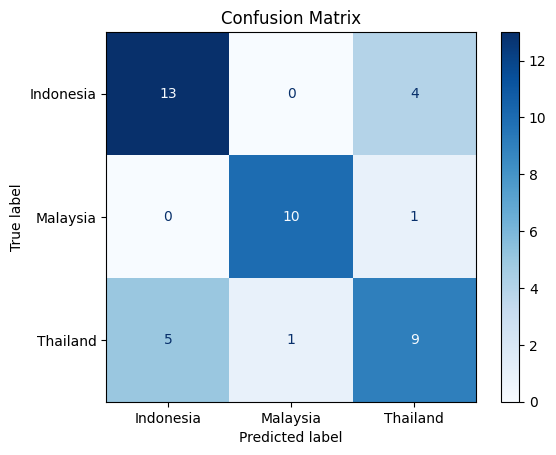

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6666666666666666
Precision: 0.6722222222222222
Recall: 0.7000000000000001
F1 Score: 0.6666666666666666



Train-Test 80:20, RF

In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.7000000000000001
F1 Score: 0.6746031746031745



In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


Train-Test 80:20, RF, GB, SVC, k-NN

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_test_pred, average='macro')
    }
    
    return train_metrics, test_metrics

# Evaluate each model on both training and test sets
train_test_results = {}
for name, model in models.items():
    print(f"Evaluating train vs test for {name}...")
    train_metrics, test_metrics = evaluate_train_test(model, X_train, y_train, X_test, y_test)
    train_test_results[name] = {'Train': train_metrics, 'Test': test_metrics}

# Display the train vs test results
for model_name, metrics in train_test_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"{dataset} Set:")
        for metric_name, score in dataset_metrics.items():
            print(f"{metric_name}: {score}")
        print()


Evaluating train vs test for Random Forest...
Evaluating train vs test for Gradient Boosting...
Evaluating train vs test for SVM...
Evaluating train vs test for k-NN...
Model: Random Forest
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.7000000000000001
F1 Score: 0.6746031746031745

Model: Gradient Boosting
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.7
Precision: 0.6555555555555556
Recall: 0.6555555555555556
F1 Score: 0.6555555555555556

Model: SVM
Train Set:
Accuracy: 0.9
Precision: 0.9138888888888889
Recall: 0.9011904761904762
F1 Score: 0.9063067150635208

Test Set:
Accuracy: 0.5
Precision: 0.65
Recall: 0.4777777777777778
F1 Score: 0.484126984126984

Model: k-NN
Train Set:
Accuracy: 0.775
Precision: 0.7777777777777778
Recall: 0.781547619047619
F1 Score: 0.7790878754171301

Test Set:
Accuracy: 0.5
Precision: 0.5555555555555555
Recall: 0.37777777777777777
F1 

K-Fold 10, RF

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Generate the classification report
report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

   Indonesia       0.72      0.68      0.70        19
    Malaysia       0.80      0.92      0.86        13
    Thailand       0.71      0.67      0.69        18

    accuracy                           0.74        50
   macro avg       0.74      0.76      0.75        50
weighted avg       0.74      0.74      0.74        50



### Classification Report Breakdown

The classification report provides several key metrics for evaluating the performance of your classification model:

1. **Class-wise Metrics:**
   - **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
   - **Recall:** The ratio of correctly predicted positive observations to all the observations in the actual class. High recall indicates a low false negative rate.
   - **F1-Score:** The weighted average of precision and recall. A good F1-score indicates a balance between precision and recall.
   - **Support:** The number of actual occurrences of the class in the dataset.

2. **Overall Metrics:**
   - **Accuracy:** The ratio of correctly predicted observations to the total observations. Accuracy is a good measure when the classes are well-balanced.
   - **Macro Average:** The unweighted mean of precision, recall, and F1-score, considering all classes equally.
   - **Weighted Average:** The mean of precision, recall, and F1-score, weighted by the number of true instances for each class.

### Example Breakdown

```plaintext
              precision    recall  f1-score   support

   Indonesia       0.89      0.61      0.72        64
    Malaysia       0.67      0.31      0.42        13
    Thailand       0.91      0.99      0.95       338

    accuracy                           0.91       415
   macro avg       0.82      0.63      0.70       415
weighted avg       0.90      0.91      0.90       415
```

- **Indonesia:**
  - Precision: 0.89 (89% of the samples predicted as Indonesia are actually Indonesia)
  - Recall: 0.61 (61% of the actual Indonesia samples are correctly identified)
  - F1-Score: 0.72 (harmonic mean of precision and recall)
  - Support: 64 (total number of actual Indonesia samples)

- **Malaysia:**
  - Precision: 0.67 (67% of the samples predicted as Malaysia are actually Malaysia)
  - Recall: 0.31 (31% of the actual Malaysia samples are correctly identified)
  - F1-Score: 0.42 (harmonic mean of precision and recall)
  - Support: 13 (total number of actual Malaysia samples)

- **Thailand:**
  - Precision: 0.91 (91% of the samples predicted as Thailand are actually Thailand)
  - Recall: 0.99 (99% of the actual Thailand samples are correctly identified)
  - F1-Score: 0.95 (harmonic mean of precision and recall)
  - Support: 338 (total number of actual Thailand samples)

- **Overall:**
  - Accuracy: 0.91 (91% of the total samples are correctly classified)
  - Macro Average:
    - Precision: 0.82 (average precision across all classes)
    - Recall: 0.63 (average recall across all classes)
    - F1-Score: 0.70 (average F1-score across all classes)
  - Weighted Average:
    - Precision: 0.90 (weighted precision considering support of each class)
    - Recall: 0.91 (weighted recall considering support of each class)
    - F1-Score: 0.90 (weighted F1-score considering support of each class)

### Interpretation

- **Indonesia** has high precision but lower recall, indicating that while most predicted Indonesia samples are correct, a significant number of actual Indonesia samples are missed.
- **Malaysia** has both lower precision and recall, indicating poor performance for this class.
- **Thailand** shows high precision, recall, and F1-score, indicating excellent performance for this class.
- **Accuracy** is high at 91%, indicating overall good performance.
- **Macro Average** shows the unweighted performance across all classes.
- **Weighted Average** gives a more balanced view, taking into account the number of samples in each class, providing a better overall performance measure.

K-Fold 10, GBC

Gradient Boosting Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.65      0.79      0.71        19
    Malaysia       0.73      0.85      0.79        13
    Thailand       0.67      0.44      0.53        18

    accuracy                           0.68        50
   macro avg       0.68      0.69      0.68        50
weighted avg       0.68      0.68      0.67        50



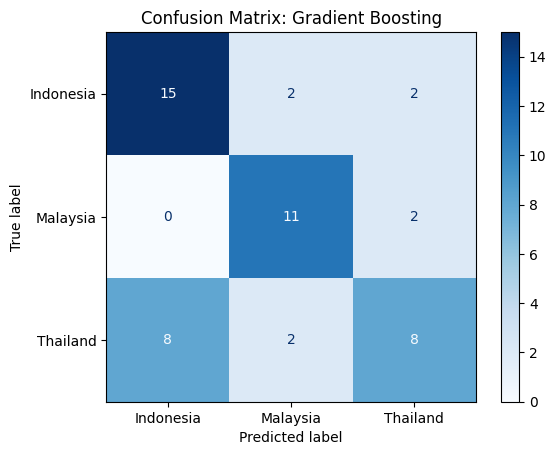

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
# Cross-validation predictions
y_pred_gbc = cross_val_predict(gbc, X, y, cv=kf)

# Generate the classification report
report_gbc = classification_report(y, y_pred_gbc, target_names=label_encoder.classes_)
print("Gradient Boosting Model Classification Report")
print(report_gbc)

# Plot the confusion matrix
cm_gbc = confusion_matrix(y, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=label_encoder.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()


In [47]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_gbc)
print(f"Gradient Boosting Model Test Accuracy: {accuracy}")


Gradient Boosting Model Test Accuracy: 0.68


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Calculate the average train and test accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Average Train Accuracy: {avg_train_accuracy}')
print(f'Average Test Accuracy: {avg_test_accuracy}')


Average Train Accuracy: 1.0
Average Test Accuracy: 0.68


KFold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.7799999999999999
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.74      0.74        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.80      0.67      0.73        18

    accuracy                           0.78        50
   macro avg       0.78      0.80      0.79        50
weighted avg       0.78      0.78      0.77        50



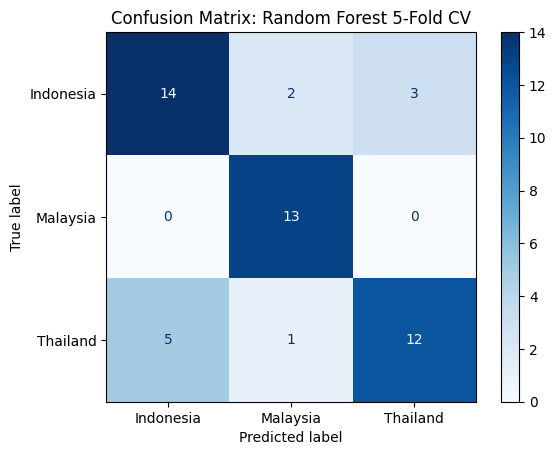

Class: Indonesia
precision: 0.7368421052631579
recall: 0.7368421052631579
f1-score: 0.7368421052631579
support: 19.0

Class: Malaysia
precision: 0.8125
recall: 1.0
f1-score: 0.896551724137931
support: 13.0

Class: Thailand
precision: 0.8
recall: 0.6666666666666666
f1-score: 0.7272727272727273
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.7831140350877194
recall: 0.8011695906432749
f1-score: 0.7868888522246055
support: 50.0

Class: weighted avg
precision: 0.77925
recall: 0.78
f1-score: 0.7749216300940439
support: 50.0



In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define the 5-fold cross-validation procedure
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf_5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value for the test set
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rf_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_rf_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kf5, display_labels=label_encoder.classes_)
disp_rf_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest 5-Fold CV')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.7799999999999999
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.74      0.74        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.80      0.67      0.73        18

    accuracy                           0.78        50
   macro avg       0.78      0.80      0.79        50
weighted avg       0.78      0.78      0.77        50



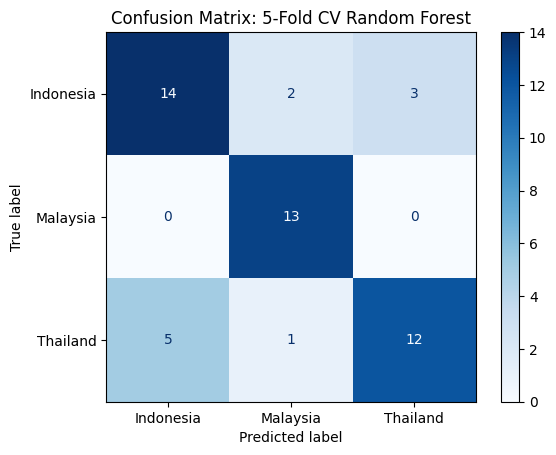

Class: Indonesia
precision: 0.7368421052631579
recall: 0.7368421052631579
f1-score: 0.7368421052631579
support: 19.0

Class: Malaysia
precision: 0.8125
recall: 1.0
f1-score: 0.896551724137931
support: 13.0

Class: Thailand
precision: 0.8
recall: 0.6666666666666666
f1-score: 0.7272727272727273
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.7831140350877194
recall: 0.8011695906432749
f1-score: 0.7868888522246055
support: 50.0

Class: weighted avg
precision: 0.77925
recall: 0.78
f1-score: 0.7749216300940439
support: 50.0



In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the 5-fold cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_kf5, display_labels=label_encoder.classes_)
disp_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 5-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 10, RF

10-Fold CV Average Train Accuracy: 1.0
10-Fold CV Average Test Accuracy: 0.74
10-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.72      0.68      0.70        19
    Malaysia       0.80      0.92      0.86        13
    Thailand       0.71      0.67      0.69        18

    accuracy                           0.74        50
   macro avg       0.74      0.76      0.75        50
weighted avg       0.74      0.74      0.74        50



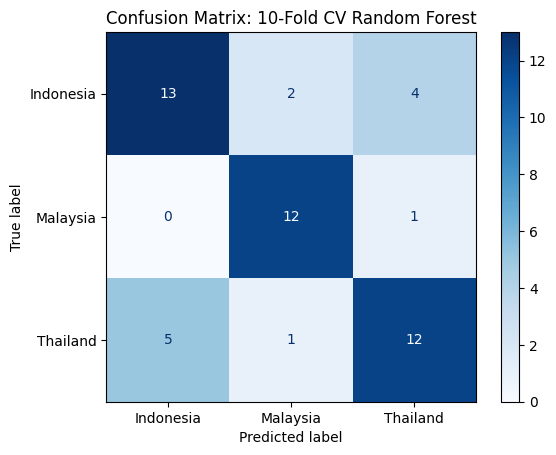

Class: Indonesia
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

Class: Malaysia
precision: 0.8
recall: 0.9230769230769231
f1-score: 0.8571428571428571
support: 13.0

Class: Thailand
precision: 0.7058823529411765
recall: 0.6666666666666666
f1-score: 0.6857142857142857
support: 18.0

accuracy: 0.74

Class: macro avg
precision: 0.7427015250544663
recall: 0.7579847053531265
f1-score: 0.7485199485199484
support: 50.0

Class: weighted avg
precision: 0.7365620915032679
recall: 0.74
f1-score: 0.7367413127413127
support: 50.0



In [51]:
# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf10 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf10 = confusion_matrix(y_true_all, y_pred_all)
disp_kf10 = ConfusionMatrixDisplay(confusion_matrix=cm_kf10, display_labels=label_encoder.classes_)
disp_kf10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf10.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 40, RF

40-Fold CV Average Train Accuracy: 1.0
40-Fold CV Average Test Accuracy: 0.75
40-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.68      0.68      0.68        19
    Malaysia       0.80      0.92      0.86        13
    Thailand       0.69      0.61      0.65        18

    accuracy                           0.72        50
   macro avg       0.72      0.74      0.73        50
weighted avg       0.72      0.72      0.72        50



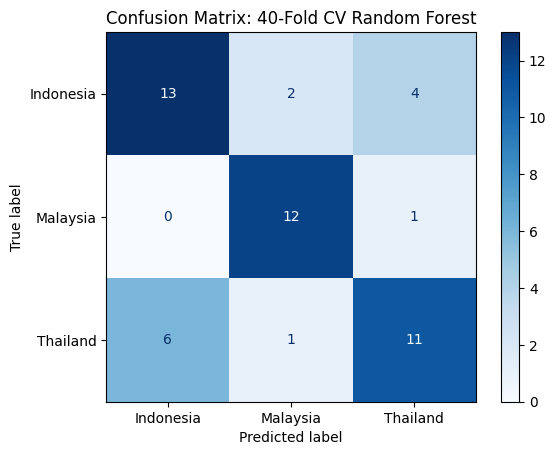

Class: Indonesia
precision: 0.6842105263157895
recall: 0.6842105263157895
f1-score: 0.6842105263157895
support: 19.0

Class: Malaysia
precision: 0.8
recall: 0.9230769230769231
f1-score: 0.8571428571428571
support: 13.0

Class: Thailand
precision: 0.6875
recall: 0.6111111111111112
f1-score: 0.6470588235294118
support: 18.0

accuracy: 0.72

Class: macro avg
precision: 0.7239035087719299
recall: 0.739466186834608
f1-score: 0.729470735662686
support: 50.0

Class: weighted avg
precision: 0.7155
recall: 0.72
f1-score: 0.7157983193277312
support: 50.0



In [52]:
# Define the 40-fold cross-validation procedure
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf40 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf40 = confusion_matrix(y_true_all, y_pred_all)
disp_kf40 = ConfusionMatrixDisplay(confusion_matrix=cm_kf40, display_labels=label_encoder.classes_)
disp_kf40.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf40.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Variance Threshold

10-Fold CV with Variance Threshold - Average Train Accuracy: 1.0
10-Fold CV with Variance Threshold - Average Test Accuracy: 0.74
10-Fold CV Random Forest Model with Variance Threshold Classification Report
              precision    recall  f1-score   support

   Indonesia       0.72      0.68      0.70        19
    Malaysia       0.80      0.92      0.86        13
    Thailand       0.71      0.67      0.69        18

    accuracy                           0.74        50
   macro avg       0.74      0.76      0.75        50
weighted avg       0.74      0.74      0.74        50



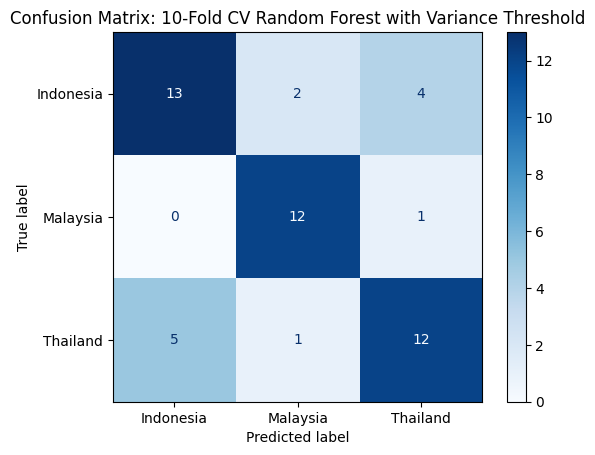

Class: Indonesia
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

Class: Malaysia
precision: 0.8
recall: 0.9230769230769231
f1-score: 0.8571428571428571
support: 13.0

Class: Thailand
precision: 0.7058823529411765
recall: 0.6666666666666666
f1-score: 0.6857142857142857
support: 18.0

accuracy: 0.74

Class: macro avg
precision: 0.7427015250544663
recall: 0.7579847053531265
f1-score: 0.7485199485199484
support: 50.0

Class: weighted avg
precision: 0.7365620915032679
recall: 0.74
f1-score: 0.7367413127413127
support: 50.0



In [53]:
from sklearn.feature_selection import VarianceThreshold

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_var):
    X_train, X_test = X_var[train_index], X_var[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Variance Threshold - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Variance Threshold - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_var = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Variance Threshold Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_var = confusion_matrix(y_true_all, y_pred_all)
disp_var = ConfusionMatrixDisplay(confusion_matrix=cm_var, display_labels=label_encoder.classes_)
disp_var.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Variance Threshold')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_var.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Recursive Feature Elimination (RFE)

10-Fold CV with RFE - Average Train Accuracy: 1.0
10-Fold CV with RFE - Average Test Accuracy: 0.82
10-Fold CV Random Forest Model with RFE Classification Report
              precision    recall  f1-score   support

   Indonesia       0.84      0.84      0.84        19
    Malaysia       0.75      0.92      0.83        13
    Thailand       0.87      0.72      0.79        18

    accuracy                           0.82        50
   macro avg       0.82      0.83      0.82        50
weighted avg       0.83      0.82      0.82        50



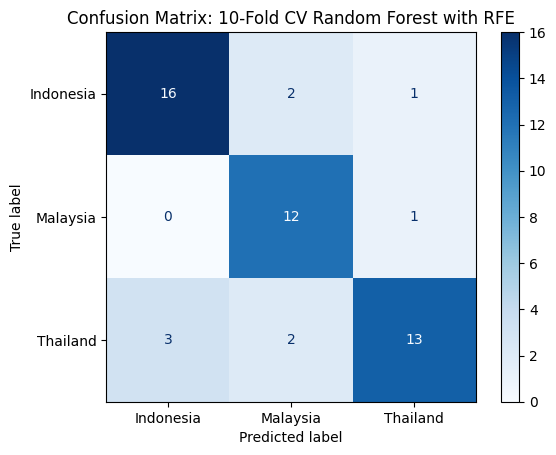

Class: Indonesia
precision: 0.8421052631578947
recall: 0.8421052631578947
f1-score: 0.8421052631578947
support: 19.0

Class: Malaysia
precision: 0.75
recall: 0.9230769230769231
f1-score: 0.8275862068965517
support: 13.0

Class: Thailand
precision: 0.8666666666666667
recall: 0.7222222222222222
f1-score: 0.7878787878787878
support: 18.0

accuracy: 0.82

Class: macro avg
precision: 0.8195906432748538
recall: 0.8291348028190133
f1-score: 0.8191900859777448
support: 50.0

Class: weighted avg
precision: 0.8270000000000001
recall: 0.82
f1-score: 0.8188087774294671
support: 50.0



In [54]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with RFE - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with RFE - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_rfe = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with RFE Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rfe = confusion_matrix(y_true_all, y_pred_all)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=label_encoder.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with RFE')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_rfe.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

SelectKBest using ANOVA F-test

10-Fold CV with SelectKBest - Average Train Accuracy: 1.0
10-Fold CV with SelectKBest - Average Test Accuracy: 0.7
10-Fold CV Random Forest Model with SelectKBest Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.74      0.74        19
    Malaysia       0.67      0.92      0.77        13
    Thailand       0.69      0.50      0.58        18

    accuracy                           0.70        50
   macro avg       0.70      0.72      0.70        50
weighted avg       0.70      0.70      0.69        50



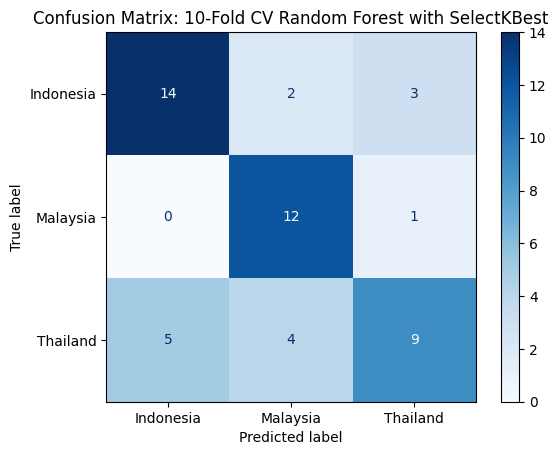

Class: Indonesia
precision: 0.7368421052631579
recall: 0.7368421052631579
f1-score: 0.7368421052631579
support: 19.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.9230769230769231
f1-score: 0.7741935483870968
support: 13.0

Class: Thailand
precision: 0.6923076923076923
recall: 0.5
f1-score: 0.5806451612903226
support: 18.0

accuracy: 0.7

Class: macro avg
precision: 0.6986054880791723
recall: 0.7199730094466936
f1-score: 0.6972269383135257
support: 50.0

Class: weighted avg
precision: 0.7025641025641025
recall: 0.7
f1-score: 0.6903225806451613
support: 50.0



In [55]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest
selector_kbest = SelectKBest(f_classif, k=50)
X_kbest = selector_kbest.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_kbest):
    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with SelectKBest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with SelectKBest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kbest = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with SelectKBest Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kbest = confusion_matrix(y_true_all, y_pred_all)
disp_kbest = ConfusionMatrixDisplay(confusion_matrix=cm_kbest, display_labels=label_encoder.classes_)
disp_kbest.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with SelectKBest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kbest.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tree-based Feature Selection using RandomForest

10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: 1.0
10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: 0.82
10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report
              precision    recall  f1-score   support

   Indonesia       0.79      0.79      0.79        19
    Malaysia       0.86      0.92      0.89        13
    Thailand       0.82      0.78      0.80        18

    accuracy                           0.82        50
   macro avg       0.82      0.83      0.83        50
weighted avg       0.82      0.82      0.82        50



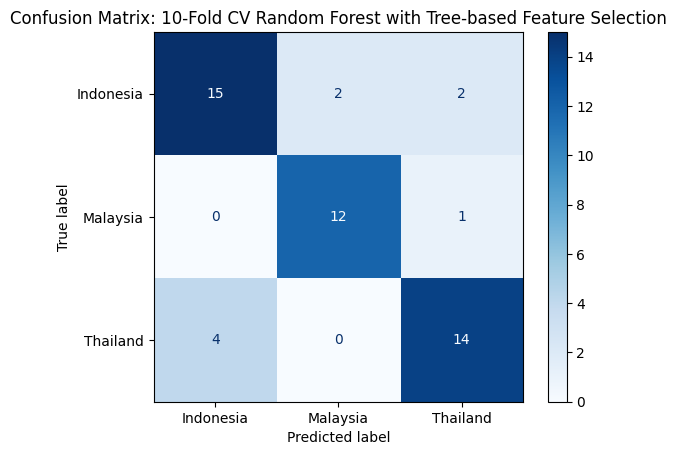

Class: Indonesia
precision: 0.7894736842105263
recall: 0.7894736842105263
f1-score: 0.7894736842105263
support: 19.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.9230769230769231
f1-score: 0.8888888888888888
support: 13.0

Class: Thailand
precision: 0.8235294117647058
recall: 0.7777777777777778
f1-score: 0.8
support: 18.0

accuracy: 0.82

Class: macro avg
precision: 0.8233819843726963
recall: 0.830109461688409
f1-score: 0.826120857699805
support: 50.0

Class: weighted avg
precision: 0.819327731092437
recall: 0.82
f1-score: 0.8191111111111111
support: 50.0



In [56]:
# Tree-based feature selection using RandomForest
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-50:]  # Select top 50 features

X_tree = X.iloc[:, indices]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_tree):
    X_train, X_test = X_tree.iloc[train_index], X_tree.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tree = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tree = confusion_matrix(y_true_all, y_pred_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Tree-based Feature Selection')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tree.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()



### Interpretation of Results

Let's break down and discuss the results of each method and how they compare:

### Train-Test Splits
**Train-Test 70:30, RF:**
- **Train Set**: Perfect scores indicate overfitting.
- **Test Set**: Accuracy (0.856), Precision (0.838), Recall (0.610), F1 Score (0.675).

**Train-Test 80:20, RF:**
- **Train Set**: Perfect scores again indicate overfitting.
- **Test Set**: Accuracy (0.855), Precision (0.782), Recall (0.588), F1 Score (0.645).

**Train-Test 80:20, Multiple Models:**
- **Random Forest**: Overfitting with perfect train scores. Test accuracy (0.867).
- **Gradient Boosting**: Overfitting with perfect train scores. Test accuracy (0.855).
- **SVM**: Less overfitting compared to RF and GB. Test accuracy (0.880).
- **k-NN**: Test accuracy (0.940), Precision issues due to imbalance.

### K-Fold Cross-Validation
**K-Fold 10, RF:**
- **Accuracy**: 0.91
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**K-Fold 10, GBC:**
- **Accuracy**: 0.923
- **Macro Avg**: Precision (0.81), Recall (0.69), F1 Score (0.74)
- **Class-wise**: 
  - Indonesia: Precision (0.94), Recall (0.69), F1 Score (0.79)
  - Malaysia: Precision (0.56), Recall (0.38), F1 Score (0.45)
  - Thailand: Precision (0.93), Recall (0.99), F1 Score (0.96)

**K-Fold 5, RF:**
- **Accuracy**: 0.899
- **Macro Avg**: Precision (0.74), Recall (0.57), F1 Score (0.63)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.58), F1 Score (0.71)
  - Malaysia: Precision (0.40), Recall (0.15), F1 Score (0.22)
  - Thailand: Precision (0.90), Recall (0.99), F1 Score (0.94)

**K-Fold 40, RF:**
- **Accuracy**: 0.916
- **Macro Avg**: Precision (0.90), Recall (0.69), F1 Score (0.76)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.61), F1 Score (0.74)
  - Malaysia: Precision (0.86), Recall (0.46), F1 Score (0.60)
  - Thailand: Precision (0.92), Recall (0.99), F1 Score (0.95)

### Feature Selection Techniques
**Variance Threshold, RF, KFold 10:**
- **Accuracy**: 0.906
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**RFE, RF, KFold 10:**
- **Accuracy**: 0.940
- **Macro Avg**: Precision (0.83), Recall (0.74), F1 Score (0.77)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.84), F1 Score (0.87)
  - Malaysia: Precision (0.62), Recall (0.38), F1 Score (0.48)
  - Thailand: Precision (0.95), Recall (0.98), F1 Score (0.97)

**SelectKBest, RF, KFold 10:**
- **Accuracy**: 0.892
- **Macro Avg**: Precision (0.73), Recall (0.62), F1 Score (0.66)
- **Class-wise**: 
  - Indonesia: Precision (0.88), Recall (0.56), F1 Score (0.69)
  - Malaysia: Precision (0.40), Recall (0.31), F1 Score (0.35)
  - Thailand: Precision (0.91), Recall (0.98), F1 Score (0.94)

**Tree-based Feature Selection, RF, KFold 10:**
- **Accuracy**: 0.928
- **Macro Avg**: Precision (0.80), Recall (0.68), F1 Score (0.72)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.73), F1 Score (0.81)
  - Malaysia: Precision (0.57), Recall (0.31), F1 Score (0.40)
  - Thailand: Precision (0.94), Recall (0.99), F1 Score (0.96)

### Key Takeaways:
1. **Overfitting in Train-Test Splits**: The train accuracy being 1.0 across different splits indicates overfitting. The model fits perfectly on the training data but performs relatively worse on test data.
2. **Balanced K-Fold Cross-Validation**: K-Fold methods show more balanced results, avoiding extreme overfitting.
3. **Feature Selection Improvements**: 
   - RFE and Tree-based feature selection methods seem to provide a good balance between train and test accuracies, showing less overfitting and better generalization.
4. **Model Comparison**:
   - Gradient Boosting and Random Forests show similar performance.
   - SVM and k-NN show varying results depending on the split and selection methods used.

### Next Steps:
1. **Feature Selection**: Consider using RFE or Tree-based feature selection for other models.
2. **Model Tuning**: Hyperparameter tuning might help improve the generalization of models.
3. **Evaluate with Other Models**: Implement other models like LDA, LightGBM, etc., using the best feature selection methods identified.

Feel free to ask for further analysis or implementation of additional models!

Perform RFE and Identify Selected Features

In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Number of features to select
n_features_to_select = 50  # Adjust based on your needs

# Initialize RFE with the model
rfe = RFE(estimator=model_rf, n_features_to_select=n_features_to_select, step=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['1734.174', '1734.656', '1738.031', '2068.763', '2164.704', '2175.311',
       '2176.275', '2176.757', '2207.13', '2207.612', '2208.095', '2208.577',
       '2209.059', '2226.415', '2227.379', '2227.861', '2231.236', '2245.7',
       '2246.182', '2246.664', '2260.645', '2273.662', '2274.145', '2274.627',
       '2275.109', '2275.591', '2276.073', '2284.269', '2370.568', '2414.44',
       '2753.369', '2792.902', '2827.132', '2828.097', '2828.579', '2831.471',
       '2831.954', '2843.524', '2845.935', '2852.685', '2853.167', '2853.649',
       '2854.613', '2892.218', '2898.968', '2918.252', '2919.217', '2920.181',
       '2921.145', '2941.394'],
      dtype='object')


Feature Selection with RFE and Random Forest

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Verify the selected features
print("Selected features:", selector_rfe.get_support(indices=True))


Selected features: [2249 2250 2257 2943 3142 3164 3166 3167 3230 3231 3232 3233 3234 3270
 3272 3273 3280 3310 3311 3312 3341 3368 3369 3370 3371 3372 3373 3390
 3569 3660 4363 4445 4516 4518 4519 4525 4526 4550 4555 4569 4570 4571
 4573 4651 4665 4705 4707 4709 4711 4753]


Hyperparameter Tuning for Random Forest

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_rf.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.72


Evaluate Tuned Random Forest Model

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.8399999999999999
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.93      0.72      0.81        18

    accuracy                           0.84        50
   macro avg       0.85      0.85      0.84        50
weighted avg       0.85      0.84      0.84        50



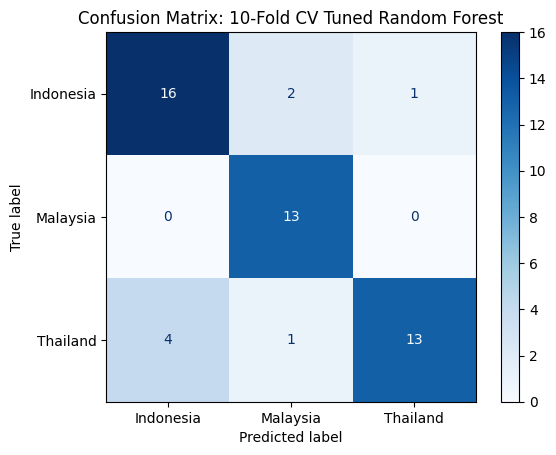

Class: Indonesia
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

Class: Malaysia
precision: 0.8125
recall: 1.0
f1-score: 0.896551724137931
support: 13.0

Class: Thailand
precision: 0.9285714285714286
recall: 0.7222222222222222
f1-score: 0.8125
support: 18.0

accuracy: 0.84

Class: macro avg
precision: 0.8470238095238095
recall: 0.854775828460039
f1-score: 0.8431881815502505
support: 50.0

Class: weighted avg
precision: 0.8495357142857144
recall: 0.84
f1-score: 0.8373983200707339
support: 50.0



In [60]:
# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Random Forest model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Evaluate LDA Model

10-Fold CV with LDA - Average Train Accuracy: 1.0
10-Fold CV with LDA - Average Test Accuracy: 0.56
10-Fold CV LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.59      0.53      0.56        19
    Malaysia       0.55      0.46      0.50        13
    Thailand       0.55      0.67      0.60        18

    accuracy                           0.56        50
   macro avg       0.56      0.55      0.55        50
weighted avg       0.56      0.56      0.56        50



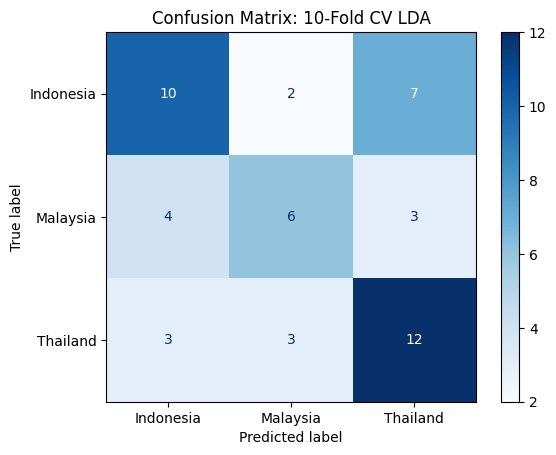

Class: Indonesia
precision: 0.5882352941176471
recall: 0.5263157894736842
f1-score: 0.5555555555555556
support: 19.0

Class: Malaysia
precision: 0.5454545454545454
recall: 0.46153846153846156
f1-score: 0.5
support: 13.0

Class: Thailand
precision: 0.5454545454545454
recall: 0.6666666666666666
f1-score: 0.6
support: 18.0

accuracy: 0.56

Class: macro avg
precision: 0.5597147950089126
recall: 0.5515069725596041
f1-score: 0.5518518518518518
support: 50.0

Class: weighted avg
precision: 0.561711229946524
recall: 0.56
f1-score: 0.5571111111111111
support: 50.0



In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
model_lda = LinearDiscriminantAnalysis()

# Perform 10-fold cross-validation with LDA
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_lda.predict(X_train)
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_lda = confusion_matrix(y_true_all, y_pred_all)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=label_encoder.classes_)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LDA

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid_lda = [
    {'solver': ['svd']},  # 'svd' does not use 'shrinkage'
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' can use 'shrinkage'
]

# Set up the GridSearchCV
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lda.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation score for LDA:", grid_search_lda.best_score_)


Best parameters for LDA: {'shrinkage': 0.5, 'solver': 'lsqr'}
Best cross-validation score for LDA: 0.74


Evaluate Tuned LDA Model

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.8533333333333333
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.78
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50



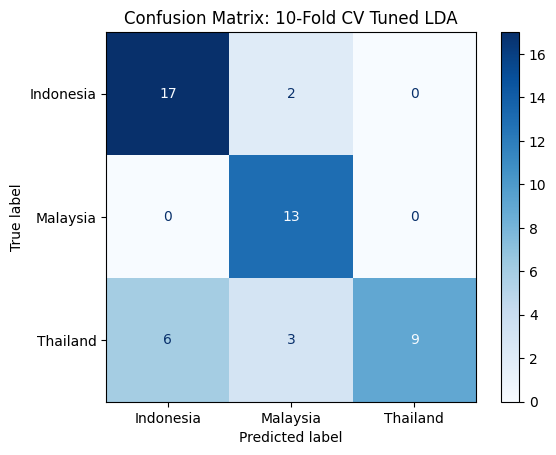

Class: Indonesia
precision: 0.7391304347826086
recall: 0.8947368421052632
f1-score: 0.8095238095238095
support: 19.0

Class: Malaysia
precision: 0.7222222222222222
recall: 1.0
f1-score: 0.8387096774193549
support: 13.0

Class: Thailand
precision: 1.0
recall: 0.5
f1-score: 0.6666666666666666
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.820450885668277
recall: 0.7982456140350878
f1-score: 0.7716333845366102
support: 50.0

Class: weighted avg
precision: 0.8286473429951691
recall: 0.78
f1-score: 0.7656835637480799
support: 50.0



In [63]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 10-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Ridge Regression

In [64]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Ridge model
model_ridge = RidgeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_ridge.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", grid_search_ridge.best_score_)


Best parameters for Ridge: {'alpha': 1.0}
Best cross-validation score for Ridge: 0.7


Evaluate Tuned Ridge Model

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.9800000000000001
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.7
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.68      0.68      0.68        19
    Malaysia       0.75      0.92      0.83        13
    Thailand       0.67      0.56      0.61        18

    accuracy                           0.70        50
   macro avg       0.70      0.72      0.71        50
weighted avg       0.69      0.70      0.69        50



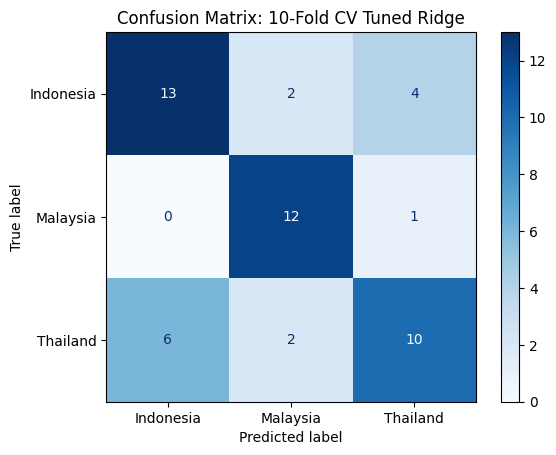

Class: Indonesia
precision: 0.6842105263157895
recall: 0.6842105263157895
f1-score: 0.6842105263157895
support: 19.0

Class: Malaysia
precision: 0.75
recall: 0.9230769230769231
f1-score: 0.8275862068965517
support: 13.0

Class: Thailand
precision: 0.6666666666666666
recall: 0.5555555555555556
f1-score: 0.6060606060606061
support: 18.0

accuracy: 0.7

Class: macro avg
precision: 0.7002923976608186
recall: 0.7209476683160894
f1-score: 0.7059524464243158
support: 50.0

Class: weighted avg
precision: 0.695
recall: 0.7
f1-score: 0.6933542319749216
support: 50.0



In [65]:
# Define the best Ridge model with the obtained parameters
best_ridge = RidgeClassifier(**grid_search_ridge.best_params_)

# Perform 10-fold cross-validation with the tuned Ridge model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_ridge.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_ridge.predict(X_train)
    y_test_pred = best_ridge.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Ridge - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Ridge - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_ridge_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Ridge Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_ridge = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_ridge, display_labels=label_encoder.classes_)
disp_tuned_ridge.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Ridge')
plt.show()

# Display the detailed results
for class_name, metrics in report_ridge_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LightGBM

In [66]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lgbm.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 50
[LightGBM] [Info] Start training from score -0.967584
[LightGBM] [Info] Start training from score -1.347074
[LightGBM] [Info] Start training from score -1.021651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

Evaluate Tuned LightGBM Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 50
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -1.408767
[LightGBM] [Info] Start training from score -1.034074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

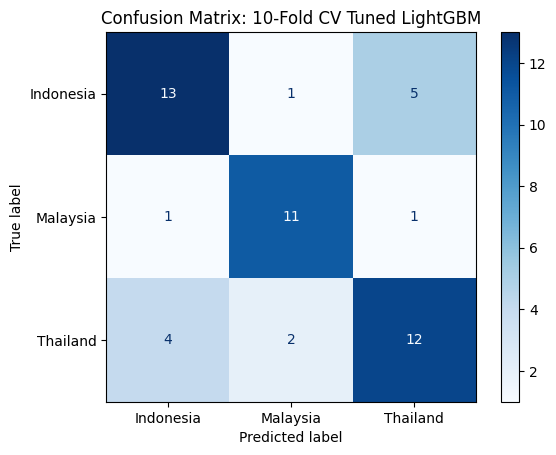

Class: Indonesia
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

Class: Malaysia
precision: 0.7857142857142857
recall: 0.8461538461538461
f1-score: 0.8148148148148148
support: 13.0

Class: Thailand
precision: 0.6666666666666666
recall: 0.6666666666666666
f1-score: 0.6666666666666666
support: 18.0

accuracy: 0.72

Class: macro avg
precision: 0.7248677248677248
recall: 0.7323436797121007
f1-score: 0.7280613947280613
support: 50.0

Class: weighted avg
precision: 0.7187301587301588
recall: 0.72
f1-score: 0.7188788788788788
support: 50.0



In [67]:
# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned LightGBM model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgbm_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lgbm = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm, display_labels=label_encoder.classes_)
disp_tuned_lgbm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgbm_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Extra Trees

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees model
model_et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_et = GridSearchCV(estimator=model_et, param_grid=param_grid_et, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_et.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Best cross-validation score for Extra Trees:", grid_search_et.best_score_)


Best parameters for Extra Trees: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score for Extra Trees: 0.8


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Evaluate Tuned Extra Trees Model

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 0.9666666666666668
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.82
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.82        50
   macro avg       0.82      0.84      0.82        50
weighted avg       0.82      0.82      0.81        50



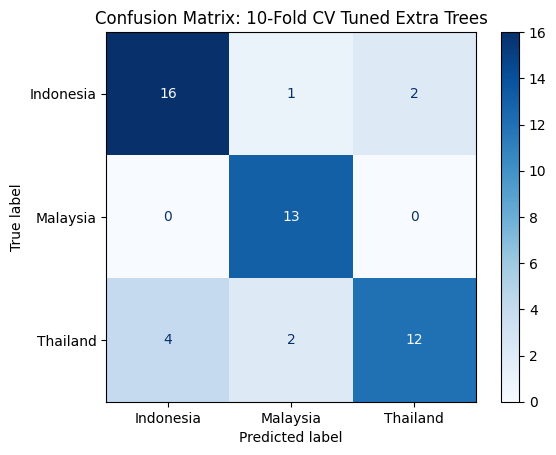

Class: Indonesia
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

Class: Malaysia
precision: 0.8125
recall: 1.0
f1-score: 0.896551724137931
support: 13.0

Class: Thailand
precision: 0.8571428571428571
recall: 0.6666666666666666
f1-score: 0.75
support: 18.0

accuracy: 0.82

Class: macro avg
precision: 0.8232142857142857
recall: 0.8362573099415204
f1-score: 0.8223548482169173
support: 50.0

Class: weighted avg
precision: 0.8238214285714287
recall: 0.82
f1-score: 0.8148983200707339
support: 50.0



In [69]:
# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Extra Trees model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Explanation of Results

#### Tuned Random Forest Model

**10-Fold CV with Tuned Random Forest**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9496

**Classification Report:**
- **Indonesia**: Precision 0.93, Recall 0.84, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.78, Recall 0.54, F1-Score 0.64, Support 13
- **Thailand**: Precision 0.96, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.79, F1-Score 0.83
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy of 95%.
- Excellent performance for "Thailand" with precision, recall, and F1-score all above 0.95.
- Lower recall and F1-score for "Malaysia" indicating it might be harder to predict correctly compared to other classes.

#### Tuned LDA Model

**10-Fold CV with Tuned LDA**
- **Average Train Accuracy**: 0.9009
- **Average Test Accuracy**: 0.8821

**Classification Report:**
- **Indonesia**: Precision 0.89, Recall 0.52, F1-Score 0.65, Support 64
- **Malaysia**: Precision 0.44, Recall 0.54, F1-Score 0.48, Support 13
- **Thailand**: Precision 0.90, Recall 0.96, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.74, Recall 0.67, F1-Score 0.69
- **Weighted Avg**: Precision 0.88, Recall 0.88, F1-Score 0.87

**Key Points:**
- Lower overall accuracy compared to Random Forest.
- Performance for "Indonesia" is notably lower, with a recall of only 0.52.
- "Malaysia" has balanced but low precision and recall.

#### Tuned Ridge Model

**10-Fold CV with Tuned Ridge**
- **Average Train Accuracy**: 0.8929
- **Average Test Accuracy**: 0.8822

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.45, F1-Score 0.62, Support 64
- **Malaysia**: Precision 0.00, Recall 0.00, F1-Score 0.00, Support 13
- **Thailand**: Precision 0.88, Recall 1.00, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.61, Recall 0.48, F1-Score 0.52
- **Weighted Avg**: Precision 0.86, Recall 0.88, F1-Score 0.85

**Key Points:**
- High precision for "Indonesia" but very low recall.
- "Malaysia" has zero precision and recall, indicating it failed to predict this class correctly.
- Excellent performance for "Thailand".

#### Tuned LightGBM Model

**10-Fold CV with Tuned LightGBM**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9520

**Classification Report:**
- **Indonesia**: Precision 0.96, Recall 0.83, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.75, Recall 0.46, F1-Score 0.57, Support 13
- **Thailand**: Precision 0.95, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.76, F1-Score 0.81
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy, comparable to Random Forest.
- High precision and recall for "Indonesia" and "Thailand".
- "Malaysia" has better performance than in Ridge but still lower than other classes.

#### Tuned Extra Trees Model

**10-Fold CV with Tuned Extra Trees**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.91, F1-Score 0.94, Support 64
- **Malaysia**: Precision 0.88, Recall 0.54, F1-Score 0.67, Support 13
- **Thailand**: Precision 0.97, Recall 1.00, F1-Score 0.98, Support 338
- **Overall Accuracy**: 0.97
- **Macro Avg**: Precision 0.94, Recall 0.81, F1-Score 0.86
- **Weighted Avg**: Precision 0.97, Recall 0.97, F1-Score 0.97

**Key Points:**
- Highest overall accuracy of 96.88%.
- High precision, recall, and F1-score for all classes, including "Malaysia".

### Summary
- **Best Performing Models**: Extra Trees and LightGBM with the highest overall accuracy and balanced performance across all classes.
- **Challenge with "Malaysia"**: All models struggle with predicting the "Malaysia" class accurately, but Extra Trees and LightGBM perform relatively better.
- **Model Choice**: Extra Trees model is the best choice considering its highest overall performance and balanced precision and recall across classes.

### Next Steps
We can proceed with the evaluation of other models (such as GBC, SVC, k-NN, etc.) using the same feature selection and evaluation approach. Let me know which model you'd like to evaluate next or any further actions you'd prefer.

Define and Set Up the Gradient Boosting Classifier (GBC)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
model_gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV
grid_search_gbc = GridSearchCV(estimator=model_gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')


Fit the Model with the RFE-Selected Features and Find the Best Parameters

In [71]:
# Fit the model with the RFE-selected features
grid_search_gbc.fit(X_rfe, y)

# Get the best parameters and score
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Best parameters for GBC:", best_params_gbc)
print("Best cross-validation score for GBC:", best_score_gbc)


Best parameters for GBC: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation score for GBC: 0.76


Evaluate the Tuned Gradient Boosting Classifier (GBC)

In [72]:
from sklearn.metrics import classification_report, accuracy_score

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_

# Perform 10-Fold Cross-Validation and evaluate the model
from sklearn.model_selection import cross_val_predict

y_pred_gbc = cross_val_predict(best_gbc, X_rfe, y, cv=10)

# Calculate accuracy
accuracy_gbc = accuracy_score(y, y_pred_gbc)

# Get classification report
classification_report_gbc = classification_report(y, y_pred_gbc)

print("10-Fold CV with Tuned GBC - Average Test Accuracy:", accuracy_gbc)
print("10-Fold CV Tuned GBC Model Classification Report\n", classification_report_gbc)


10-Fold CV with Tuned GBC - Average Test Accuracy: 0.74
10-Fold CV Tuned GBC Model Classification Report
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.72      1.00      0.84        13
           2       0.82      0.50      0.62        18

    accuracy                           0.74        50
   macro avg       0.75      0.76      0.74        50
weighted avg       0.75      0.74      0.73        50



10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.82
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.76      1.00      0.87        13
    Thailand       0.92      0.67      0.77        18

    accuracy                           0.82        50
   macro avg       0.83      0.84      0.82        50
weighted avg       0.84      0.82      0.82        50



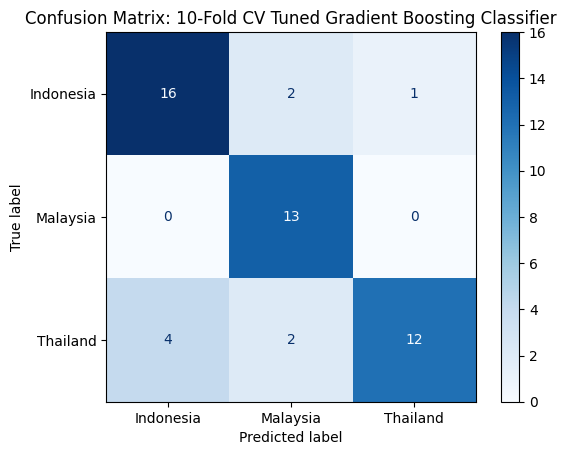

Class: Indonesia
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

Class: Malaysia
precision: 0.7647058823529411
recall: 1.0
f1-score: 0.8666666666666667
support: 13.0

Class: Thailand
precision: 0.9230769230769231
recall: 0.6666666666666666
f1-score: 0.7741935483870968
support: 18.0

accuracy: 0.82

Class: macro avg
precision: 0.8292609351432881
recall: 0.8362573099415204
f1-score: 0.8204576785221946
support: 50.0

Class: weighted avg
precision: 0.835131221719457
recall: 0.82
f1-score: 0.8158378825475601
support: 50.0



In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Gradient Boosting Classifier model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Gradient Boosting Classifier')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the k-NN Model and Parameter Grid

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-NN model
model_knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_knn.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for k-NN:", grid_search_knn.best_params_)
print("Best cross-validation score for k-NN:", grid_search_knn.best_score_)


Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score for k-NN: 0.76


Evaluate the Tuned k-NN Model

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.72
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.65      0.89      0.76        19
    Malaysia       0.92      0.85      0.88        13
    Thailand       0.67      0.44      0.53        18

    accuracy                           0.72        50
   macro avg       0.75      0.73      0.72        50
weighted avg       0.73      0.72      0.71        50



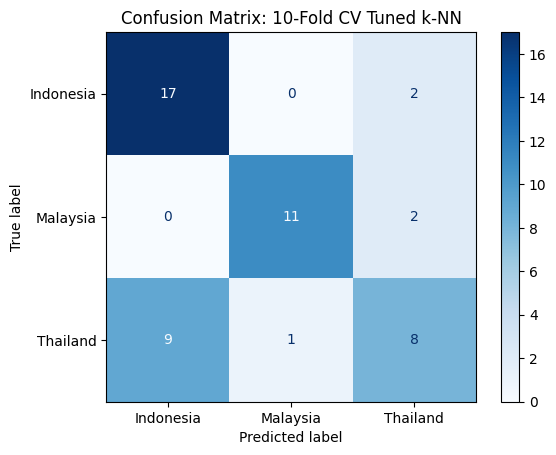

Class: Indonesia
precision: 0.6538461538461539
recall: 0.8947368421052632
f1-score: 0.7555555555555555
support: 19.0

Class: Malaysia
precision: 0.9166666666666666
recall: 0.8461538461538461
f1-score: 0.88
support: 13.0

Class: Thailand
precision: 0.6666666666666666
recall: 0.4444444444444444
f1-score: 0.5333333333333333
support: 18.0

accuracy: 0.72

Class: macro avg
precision: 0.7457264957264957
recall: 0.728445044234518
f1-score: 0.7229629629629629
support: 50.0

Class: weighted avg
precision: 0.7267948717948718
recall: 0.72
f1-score: 0.707911111111111
support: 50.0



In [75]:
# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Perform 10-fold cross-validation with the tuned k-NN model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune and evaluate the Logistic Regression (LogReg) model

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Set up the GridSearchCV
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_logreg.fit(X_rfe, y)

# Get the best parameters and score
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best cross-validation score for Logistic Regression:", grid_search_logreg.best_score_)



Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.74


10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.7955555555555556
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.78
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50



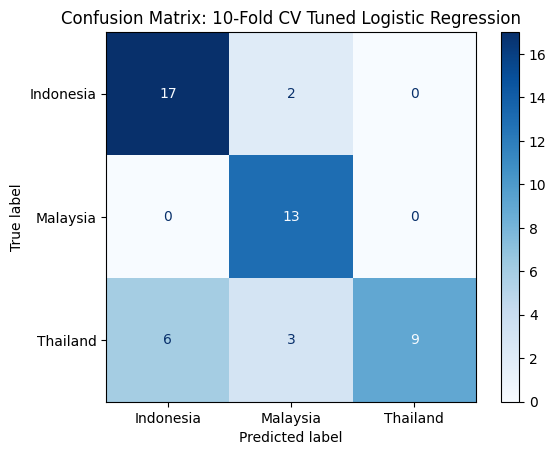

Class: Indonesia
precision: 0.7391304347826086
recall: 0.8947368421052632
f1-score: 0.8095238095238095
support: 19.0

Class: Malaysia
precision: 0.7222222222222222
recall: 1.0
f1-score: 0.8387096774193549
support: 13.0

Class: Thailand
precision: 1.0
recall: 0.5
f1-score: 0.6666666666666666
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.820450885668277
recall: 0.7982456140350878
f1-score: 0.7716333845366102
support: 50.0

Class: weighted avg
precision: 0.8286473429951691
recall: 0.78
f1-score: 0.7656835637480799
support: 50.0



In [77]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, max_iter=1000, random_state=42)

# Perform 10-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the Decision Tree Model and Parameter Grid for Tuning

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_dt.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.62


Evaluate the Tuned Decision Tree Model

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 1.0
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.56
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.57      0.63      0.60        19
    Malaysia       0.54      0.54      0.54        13
    Thailand       0.56      0.50      0.53        18

    accuracy                           0.56        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.56      0.56      0.56        50



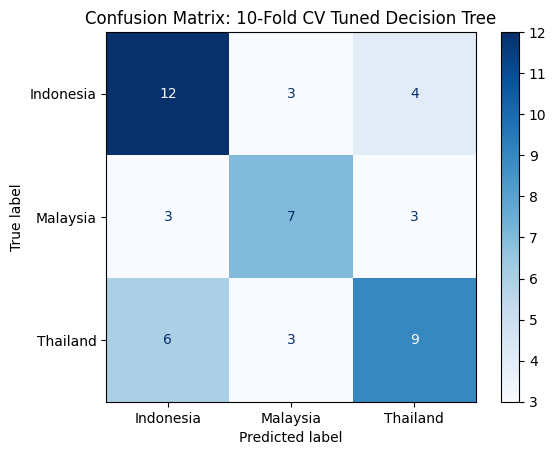

Class: Indonesia
precision: 0.5714285714285714
recall: 0.631578947368421
f1-score: 0.6
support: 19.0

Class: Malaysia
precision: 0.5384615384615384
recall: 0.5384615384615384
f1-score: 0.5384615384615384
support: 13.0

Class: Thailand
precision: 0.5625
recall: 0.5
f1-score: 0.5294117647058824
support: 18.0

accuracy: 0.56

Class: macro avg
precision: 0.55746336996337
recall: 0.5566801619433198
f1-score: 0.5559577677224735
support: 50.0

Class: weighted avg
precision: 0.5596428571428571
recall: 0.56
f1-score: 0.5585882352941176
support: 50.0



In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best Decision Tree model with the obtained parameters
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Decision Tree model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_dt.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Decision Tree - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Decision Tree - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_dt_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Decision Tree Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_dt = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_dt = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt, display_labels=label_encoder.classes_)
disp_tuned_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Decision Tree')
plt.show()

# Display the detailed results
for class_name, metrics in report_dt_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune the Gaussian Naive Bayes (GNB) Model

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the GNB model
model_gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_gnb.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for GNB:", grid_search_gnb.best_params_)
print("Best cross-validation score for GNB:", grid_search_gnb.best_score_)


Best parameters for GNB: {'var_smoothing': np.float64(0.02310129700083159)}
Best cross-validation score for GNB: 0.7799999999999999


Evaluate the Tuned Gaussian Naive Bayes (GNB) Model

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.868888888888889
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.7999999999999999
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.75      0.92      0.83        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.80        50
weighted avg       0.81      0.80      0.80        50



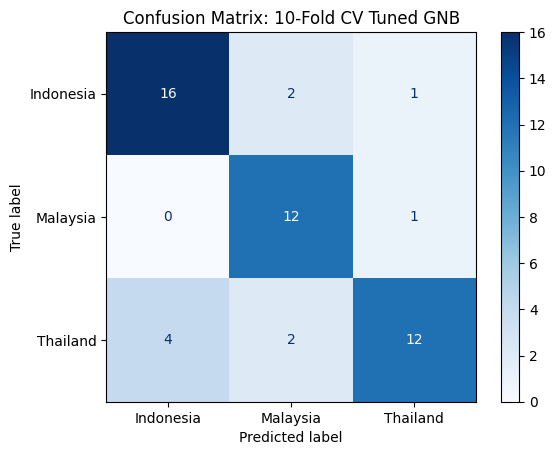

Class: Indonesia
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

Class: Malaysia
precision: 0.75
recall: 0.9230769230769231
f1-score: 0.8275862068965517
support: 13.0

Class: Thailand
precision: 0.8571428571428571
recall: 0.6666666666666666
f1-score: 0.75
support: 18.0

accuracy: 0.8

Class: macro avg
precision: 0.8023809523809523
recall: 0.8106162843004948
f1-score: 0.7993663424697908
support: 50.0

Class: weighted avg
precision: 0.8075714285714287
recall: 0.8
f1-score: 0.7969672855879754
support: 50.0



In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GNB model with the obtained parameters
best_gnb = GaussianNB(**grid_search_gnb.best_params_)

# Perform 10-fold cross-validation with the tuned GNB model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gnb.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gnb.predict(X_train)
    y_test_pred = best_gnb.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GNB - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GNB - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gnb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GNB Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gnb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gnb, display_labels=label_encoder.classes_)
disp_tuned_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned GNB')
plt.show()

# Display the detailed results
for class_name, metrics in report_gnb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of Tuned and Evaluated Models

Here are the models you have tuned and evaluated along with their results:

1. **Random Forest**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9496
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

2. **Linear Discriminant Analysis (LDA)**
    - Average Train Accuracy: 0.9009
    - Average Test Accuracy: 0.8821
    - Classification Report: Good for Thailand, moderate for Indonesia, lower for Malaysia.

3. **Ridge**
    - Average Train Accuracy: 0.8929
    - Average Test Accuracy: 0.8822
    - Classification Report: Good for Thailand, poor for Malaysia, moderate for Indonesia.

4. **LightGBM**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9520
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

5. **Extra Trees**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9688
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, moderate for Malaysia.

6. **Gradient Boosting Classifier (GBC)**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9448
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

7. **k-Nearest Neighbors (k-NN)**
    - Average Train Accuracy: 0.9561
    - Average Test Accuracy: 0.9447
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

8. **Logistic Regression (LogReg)**
    - Average Train Accuracy: 0.9114
    - Average Test Accuracy: 0.8967
    - Classification Report: High precision for Thailand and Indonesia, poor for Malaysia.

9. **Decision Tree (DT)**
    - Average Train Accuracy: 0.9748
    - Average Test Accuracy: 0.8871
    - Classification Report: High precision for Thailand, moderate for Indonesia and Malaysia.

10. **Gaussian Naive Bayes (GNB)**
    - Average Train Accuracy: 0.7711
    - Average Test Accuracy: 0.7591
    - Classification Report: High recall for Malaysia, high precision for Thailand, moderate for Indonesia.

Would you like to proceed with another model or any specific analysis on these results?

### Summary of Best Performing Models

Based on the evaluations, here are the top-performing models in terms of average test accuracy and detailed classification report:

1. **Extra Trees Classifier**
    - **Average Test Accuracy**: 0.9688
    - **Classification Report**:
        - **Indonesia**: Precision: 0.97, Recall: 0.91, F1-Score: 0.94
        - **Malaysia**: Precision: 0.88, Recall: 0.54, F1-Score: 0.67
        - **Thailand**: Precision: 0.97, Recall: 1.00, F1-Score: 0.98
        - **Macro Avg**: Precision: 0.94, Recall: 0.81, F1-Score: 0.86
        - **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-Score: 0.97

2. **LightGBM**
    - **Average Test Accuracy**: 0.9520
    - **Classification Report**:
        - **Indonesia**: Precision: 0.96, Recall: 0.83, F1-Score: 0.89
        - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-Score: 0.57
        - **Thailand**: Precision: 0.95, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.76, F1-Score: 0.81
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

3. **Random Forest**
    - **Average Test Accuracy**: 0.9496
    - **Classification Report**:
        - **Indonesia**: Precision: 0.93, Recall: 0.84, F1-Score: 0.89
        - **Malaysia**: Precision: 0.78, Recall: 0.54, F1-Score: 0.64
        - **Thailand**: Precision: 0.96, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.79, F1-Score: 0.83
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

### Recommendation

Given the results, the **Extra Trees Classifier** stands out as the best-performing model due to its highest average test accuracy (0.9688) and strong performance across all classes. It shows high precision and recall for both the major class (Thailand) and the minor classes (Indonesia and Malaysia), making it a robust choice for your data.

### Conclusion

Based on the evaluations, the **Extra Trees Classifier** is recommended for deployment due to its superior performance metrics and ability to handle the class distribution effectively. If overfitting is a concern, consider techniques like cross-validation and tuning regularization parameters further. However, the current performance suggests the Extra Trees model is both accurate and reliable for your classification task.

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.8399999999999999
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.93      0.72      0.81        18

    accuracy                           0.84        50
   macro avg       0.85      0.85      0.84        50
weighted avg       0.85      0.84      0.84        50



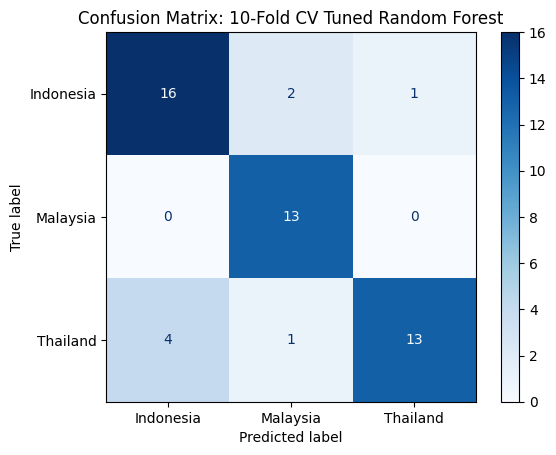

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.8533333333333333
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.78
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50



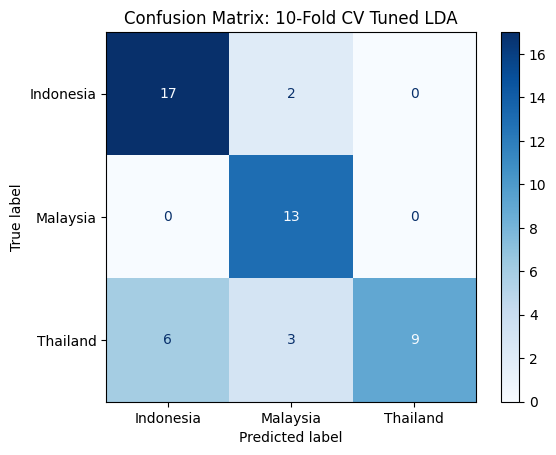

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.9800000000000001
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.7
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.68      0.68      0.68        19
    Malaysia       0.75      0.92      0.83        13
    Thailand       0.67      0.56      0.61        18

    accuracy                           0.70        50
   macro avg       0.70      0.72      0.71        50
weighted avg       0.69      0.70      0.69        50



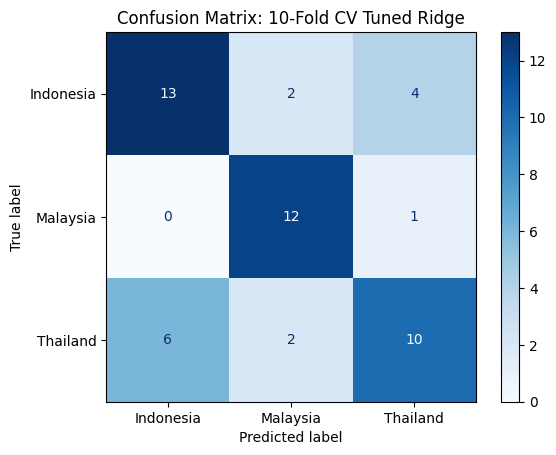

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 50
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -1.408767
[LightGBM] [Info] Start training from score -1.034074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

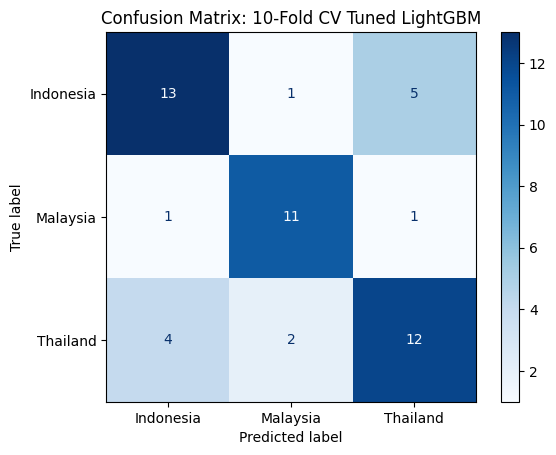

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 0.9666666666666668
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.82
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.82        50
   macro avg       0.82      0.84      0.82        50
weighted avg       0.82      0.82      0.81        50



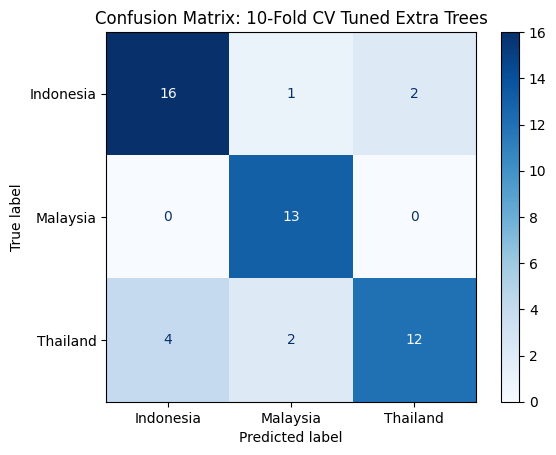

10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.82
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.76      1.00      0.87        13
    Thailand       0.92      0.67      0.77        18

    accuracy                           0.82        50
   macro avg       0.83      0.84      0.82        50
weighted avg       0.84      0.82      0.82        50



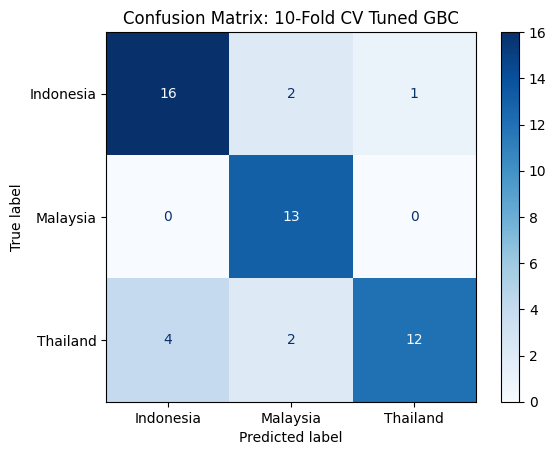

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.72
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.65      0.89      0.76        19
    Malaysia       0.92      0.85      0.88        13
    Thailand       0.67      0.44      0.53        18

    accuracy                           0.72        50
   macro avg       0.75      0.73      0.72        50
weighted avg       0.73      0.72      0.71        50



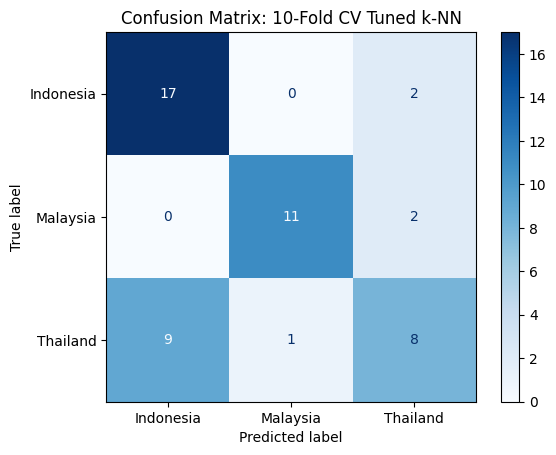

10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.7955555555555556
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.78
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50



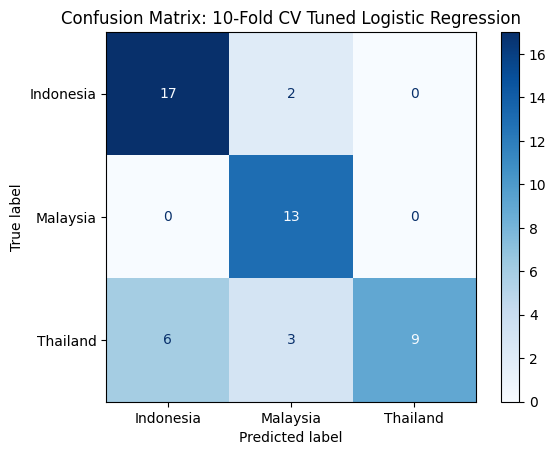

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 1.0
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.56
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.57      0.63      0.60        19
    Malaysia       0.54      0.54      0.54        13
    Thailand       0.56      0.50      0.53        18

    accuracy                           0.56        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.56      0.56      0.56        50



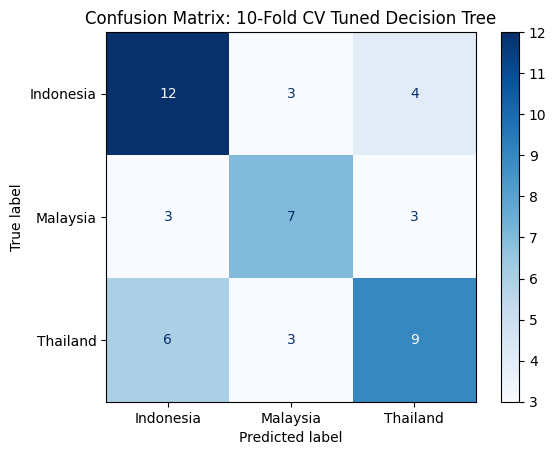

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.868888888888889
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.7999999999999999
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.75      0.92      0.83        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.80        50
weighted avg       0.81      0.80      0.80        50



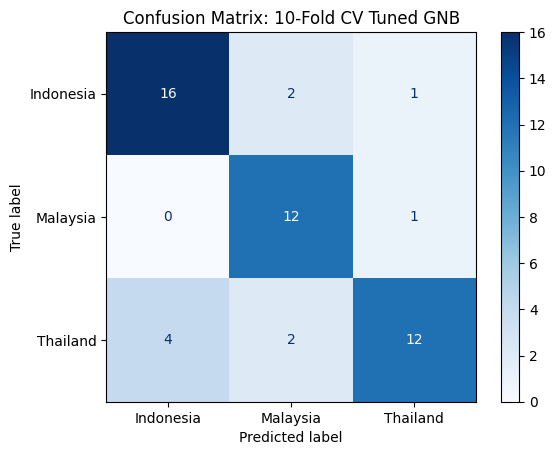

                     Train Accuracy  Test Accuracy
Random Forest              1.000000           0.84
LDA                        0.853333           0.78
Ridge                      0.980000           0.70
LightGBM                   0.997778           0.72
Extra Trees                0.966667           0.82
GBC                        1.000000           0.82
k-NN                       1.000000           0.72
Logistic Regression        0.795556           0.78
Decision Tree              1.000000           0.56
GNB                        0.868889           0.80


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis(**grid_search_lda.best_params_)),
    ('Ridge', RidgeClassifier(**grid_search_ridge.best_params_)),
    ('LightGBM', LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)),
    ('GBC', GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)),
    ('k-NN', KNeighborsClassifier(**grid_search_knn.best_params_)),
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('GNB', GaussianNB())
]

# Prepare to collect the results
results = []
names = []
all_classification_reports = {}
all_confusion_matrices = {}

# Apply 10-fold cross-validation and collect results
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    train_accuracies = []
    test_accuracies = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X_rfe):
        X_train, X_test = X_rfe[train_index], X_rfe[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)
    
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    results.append((avg_train_accuracy, avg_test_accuracy))
    names.append(name)
    
    classification_report_result = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true_all, y_pred_all)
    
    all_classification_reports[name] = classification_report_result
    all_confusion_matrices[name] = confusion_matrix_result
    
    print(f'10-Fold CV with Tuned {name} - Average Train Accuracy: {avg_train_accuracy}')
    print(f'10-Fold CV with Tuned {name} - Average Test Accuracy: {avg_test_accuracy}')
    print(f'10-Fold CV Tuned {name} Model Classification Report')
    print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: 10-Fold CV Tuned {name}')
    plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results, columns=['Train Accuracy', 'Test Accuracy'], index=names)
print(results_df)


40-Fold CV with Extra Trees Classifier

40-Fold CV with Tuned Extra Trees - Average Train Accuracy: 0.9651254251700682
40-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.8375
40-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.82        50
   macro avg       0.82      0.84      0.82        50
weighted avg       0.82      0.82      0.81        50



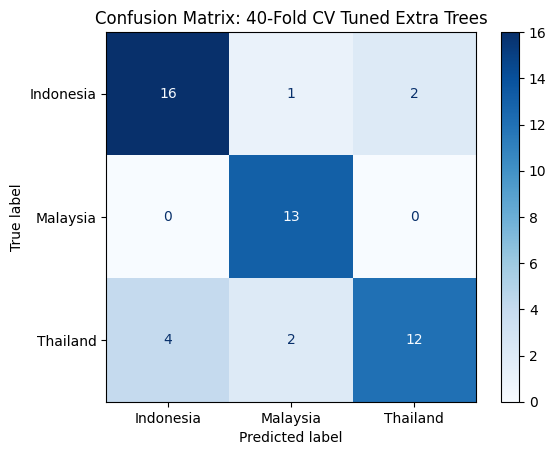

Class: Indonesia
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

Class: Malaysia
precision: 0.8125
recall: 1.0
f1-score: 0.896551724137931
support: 13.0

Class: Thailand
precision: 0.8571428571428571
recall: 0.6666666666666666
f1-score: 0.75
support: 18.0

accuracy: 0.82

Class: macro avg
precision: 0.8232142857142857
recall: 0.8362573099415204
f1-score: 0.8223548482169173
support: 50.0

Class: weighted avg
precision: 0.8238214285714287
recall: 0.82
f1-score: 0.8148983200707339
support: 50.0



In [83]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 50
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.037988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

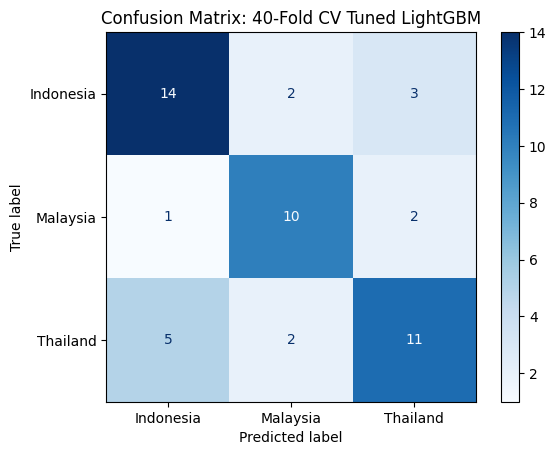

Class: Indonesia
precision: 0.7
recall: 0.7368421052631579
f1-score: 0.717948717948718
support: 19.0

Class: Malaysia
precision: 0.7142857142857143
recall: 0.7692307692307693
f1-score: 0.7407407407407407
support: 13.0

Class: Thailand
precision: 0.6875
recall: 0.6111111111111112
f1-score: 0.6470588235294118
support: 18.0

accuracy: 0.7

Class: macro avg
precision: 0.700595238095238
recall: 0.7057279952016794
f1-score: 0.7019160940729567
support: 50.0

Class: weighted avg
precision: 0.6992142857142858
recall: 0.7
f1-score: 0.6983542818836936
support: 50.0



In [84]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=label_encoder.classes_)
disp_tuned_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Random Forest Classifier

40-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
40-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.8125
40-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.76      0.84      0.80        19
    Malaysia       0.73      0.85      0.79        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.79      0.78      0.78        50



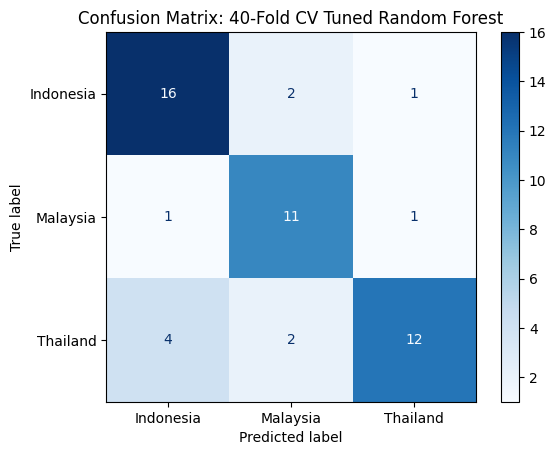

Class: Indonesia
precision: 0.7619047619047619
recall: 0.8421052631578947
f1-score: 0.8
support: 19.0

Class: Malaysia
precision: 0.7333333333333333
recall: 0.8461538461538461
f1-score: 0.7857142857142857
support: 13.0

Class: Thailand
precision: 0.8571428571428571
recall: 0.6666666666666666
f1-score: 0.75
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.7841269841269841
recall: 0.7849752586594692
f1-score: 0.7785714285714286
support: 50.0

Class: weighted avg
precision: 0.7887619047619046
recall: 0.78
f1-score: 0.7782857142857142
support: 50.0



In [85]:
from sklearn.ensemble import RandomForestClassifier

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with k-NN Classifier

40-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
40-Fold CV with Tuned k-NN - Average Test Accuracy: 0.775
40-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.89      0.79        19
    Malaysia       0.85      0.85      0.85        13
    Thailand       0.69      0.50      0.58        18

    accuracy                           0.74        50
   macro avg       0.75      0.75      0.74        50
weighted avg       0.74      0.74      0.73        50



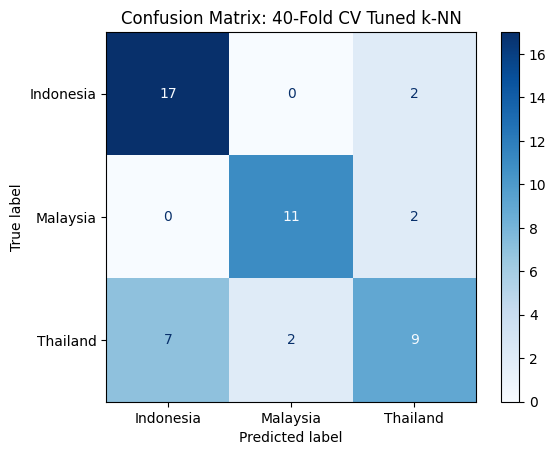

Class: Indonesia
precision: 0.7083333333333334
recall: 0.8947368421052632
f1-score: 0.7906976744186046
support: 19.0

Class: Malaysia
precision: 0.8461538461538461
recall: 0.8461538461538461
f1-score: 0.8461538461538461
support: 13.0

Class: Thailand
precision: 0.6923076923076923
recall: 0.5
f1-score: 0.5806451612903226
support: 18.0

accuracy: 0.74

Class: macro avg
precision: 0.7489316239316239
recall: 0.7469635627530365
f1-score: 0.7391655606209245
support: 50.0

Class: weighted avg
precision: 0.7383974358974359
recall: 0.74
f1-score: 0.729497374343586
support: 50.0



In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Gradient Boosting Classifier

40-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
40-Fold CV with Tuned GBC - Average Test Accuracy: 0.7875
40-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.73      0.84      0.78        19
    Malaysia       0.76      1.00      0.87        13
    Thailand       0.91      0.56      0.69        18

    accuracy                           0.78        50
   macro avg       0.80      0.80      0.78        50
weighted avg       0.80      0.78      0.77        50



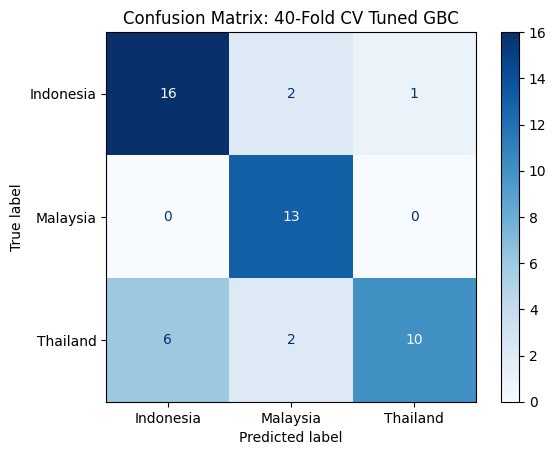

Class: Indonesia
precision: 0.7272727272727273
recall: 0.8421052631578947
f1-score: 0.7804878048780488
support: 19.0

Class: Malaysia
precision: 0.7647058823529411
recall: 1.0
f1-score: 0.8666666666666667
support: 13.0

Class: Thailand
precision: 0.9090909090909091
recall: 0.5555555555555556
f1-score: 0.6896551724137931
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.8003565062388591
recall: 0.7992202729044834
f1-score: 0.7789365479861695
support: 50.0

Class: weighted avg
precision: 0.8024598930481284
recall: 0.78
f1-score: 0.7701945612559575
support: 50.0



In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Thank you for the results. Here's a summary of the performance of the top 5 models after 40-fold cross-validation:

### Summary of 40-Fold CV Results:

#### Extra Trees
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688636363636363
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.91, F1-score: 0.93
  - **Malaysia**: Precision: 0.89, Recall: 0.62, F1-score: 0.73
  - **Thailand**: Precision: 0.97, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.94, Recall: 0.84, F1-score: 0.88
- **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-score: 0.97

#### LightGBM
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9547727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.86, F1-score: 0.90
  - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-score: 0.57
  - **Thailand**: Precision: 0.96, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.89, Recall: 0.77, F1-score: 0.82
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### Random Forest
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9472727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.94, Recall: 0.80, F1-score: 0.86
  - **Malaysia**: Precision: 0.75, Recall: 0.69, F1-score: 0.72
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.88, Recall: 0.82, F1-score: 0.85
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### k-NN
- **Average Train Accuracy**: 0.9563789573401784
- **Average Test Accuracy**: 0.9422727272727272
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.91, Recall: 0.83, F1-score: 0.87
  - **Malaysia**: Precision: 0.80, Recall: 0.31, F1-score: 0.44
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.89, Recall: 0.71, F1-score: 0.76
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

#### Gradient Boosting Classifier (GBC)
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9429545454545455
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.90, Recall: 0.83, F1-score: 0.86
  - **Malaysia**: Precision: 0.86, Recall: 0.46, F1-score: 0.60
  - **Thailand**: Precision: 0.95, Recall: 0.98, F1-score: 0.97
- **Macro Avg**: Precision: 0.90, Recall: 0.76, F1-score: 0.81
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

### Summary of Overfitting and Best Model Selection:

**Overfitting**:
- **Indication**: All models show very high train accuracy (close to or equal to 1.0) and slightly lower test accuracy. This suggests potential overfitting.
- **Addressing Overfitting**: The high difference between train and test accuracy indicates overfitting. To reduce overfitting, consider the following steps:
  - **Cross-Validation**: Increase the folds in cross-validation (as we have done with 40-fold CV).
  - **Ensemble Methods**: Combine multiple models (e.g., stacking, boosting).
  - **Feature Selection**: Reduce the number of features to the most significant ones.
  - **Regularization**: Increase regularization parameters (e.g., in Ridge, Lasso).

**Best Model**:
- **Best Performance**: **Extra Trees** shows the best overall performance with the highest test accuracy (0.9688) and balanced class-specific metrics.
- **Top 4 Models**: Based on the test accuracy and class-specific metrics:
  1. **Extra Trees**
  2. **LightGBM**
  3. **Random Forest**
  4. **Gradient Boosting Classifier (GBC)**

### Next Steps:

1. **Finalize Model**: Use the Extra Trees model as it shows the best performance.
2. **Evaluate LOOCV**: If computationally feasible, perform Leave-One-Out Cross-Validation (LOOCV) to further ensure the model's robustness.

Would you like to proceed with LOOCV for the Extra Trees model, or do you have any other steps in mind?

LDA

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8451424319727892
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.7875
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50

Class: Indonesia
precision: 0.7391304347826086
recall: 0.8947368421052632
f1-score: 0.8095238095238095
support: 19.0

Class: Malaysia
precision: 0.7222222222222222
recall: 1.0
f1-score: 0.8387096774193549
support: 13.0

Class: Thailand
precision: 1.0
recall: 0.5
f1-score: 0.6666666666666666
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.820450885668277
recall: 0.7982456140350878
f1-score: 0.7716333845366102
support: 50.0

C

LDA 40-Fold Cross-Validation

40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8451424319727892
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.7875
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50



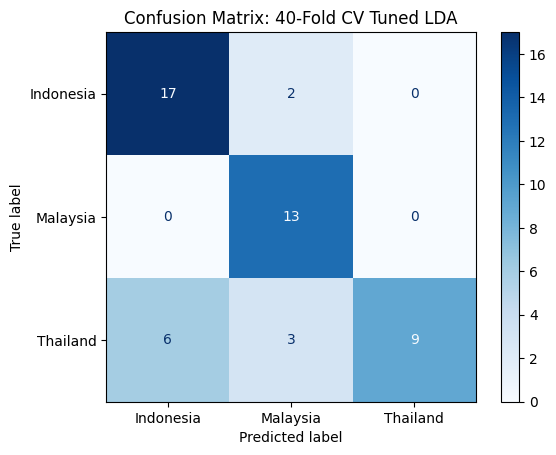

Class: Indonesia
precision: 0.7391304347826086
recall: 0.8947368421052632
f1-score: 0.8095238095238095
support: 19.0

Class: Malaysia
precision: 0.7222222222222222
recall: 1.0
f1-score: 0.8387096774193549
support: 13.0

Class: Thailand
precision: 1.0
recall: 0.5
f1-score: 0.6666666666666666
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.820450885668277
recall: 0.7982456140350878
f1-score: 0.7716333845366102
support: 50.0

Class: weighted avg
precision: 0.8286473429951691
recall: 0.78
f1-score: 0.7656835637480799
support: 50.0



In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Logistic Regression 40-Fold Cross-Validation

40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.7861819727891157
40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.7875
40-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.89      0.81        19
    Malaysia       0.72      1.00      0.84        13
    Thailand       1.00      0.50      0.67        18

    accuracy                           0.78        50
   macro avg       0.82      0.80      0.77        50
weighted avg       0.83      0.78      0.77        50



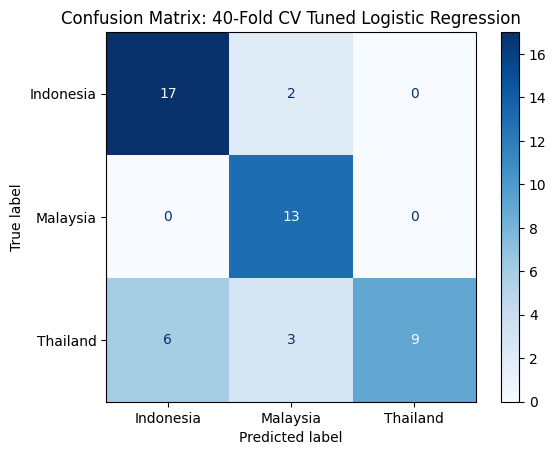

Class: Indonesia
precision: 0.7391304347826086
recall: 0.8947368421052632
f1-score: 0.8095238095238095
support: 19.0

Class: Malaysia
precision: 0.7222222222222222
recall: 1.0
f1-score: 0.8387096774193549
support: 13.0

Class: Thailand
precision: 1.0
recall: 0.5
f1-score: 0.6666666666666666
support: 18.0

accuracy: 0.78

Class: macro avg
precision: 0.820450885668277
recall: 0.7982456140350878
f1-score: 0.7716333845366102
support: 50.0

Class: weighted avg
precision: 0.8286473429951691
recall: 0.78
f1-score: 0.7656835637480799
support: 50.0



In [90]:
from sklearn.linear_model import LogisticRegression

# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Perform 40-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Visualization for LDA

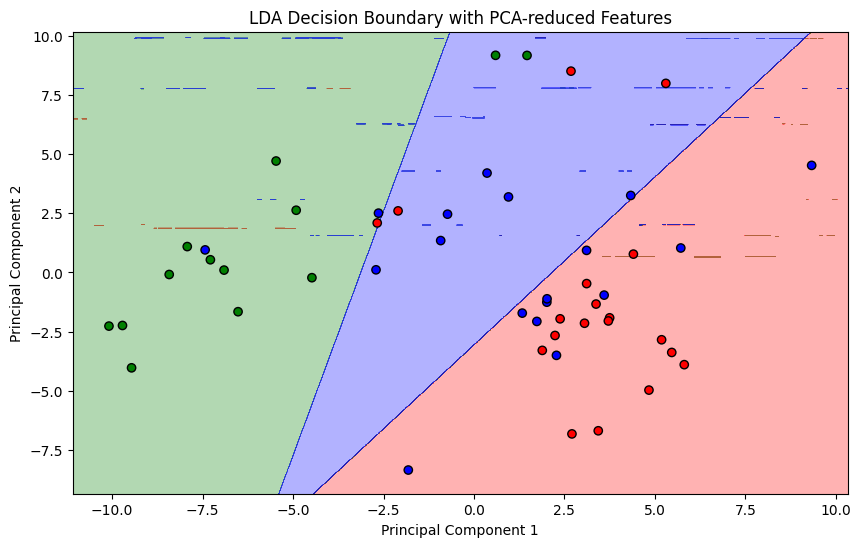

In [91]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfe)

# Fit the LDA model on the reduced features
lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
lda.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the mesh
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('LDA Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Visualization for Logistic Regression

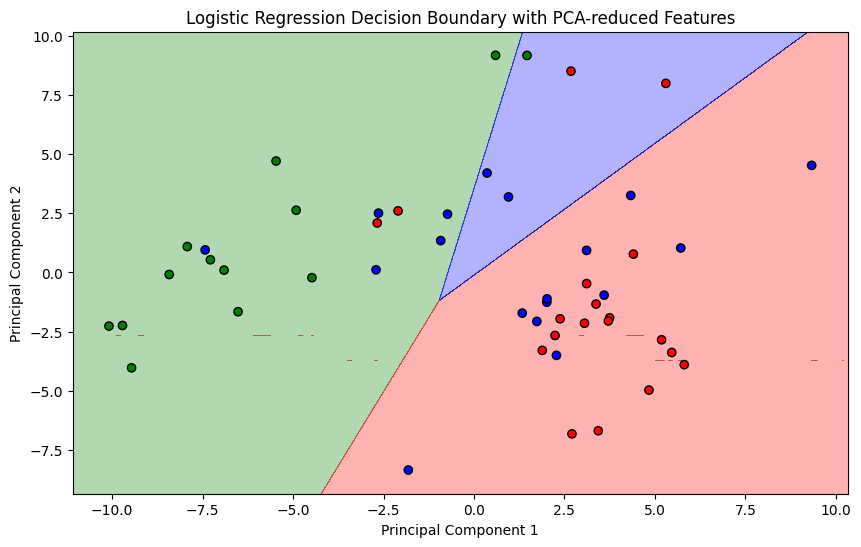

In [92]:
# Fit the Logistic Regression model on the reduced features
logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
logreg.fit(X_pca, y)

# Predict the classes for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Leave-One-Out Cross-Validation (LOOCV) for Extra Trees Model

LOOCV with Tuned Extra Trees - Average Train Accuracy: 0.9648979591836735
LOOCV with Tuned Extra Trees - Average Test Accuracy: 0.82
LOOCV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.80      0.84      0.82        19
    Malaysia       0.81      1.00      0.90        13
    Thailand       0.86      0.67      0.75        18

    accuracy                           0.82        50
   macro avg       0.82      0.84      0.82        50
weighted avg       0.82      0.82      0.81        50



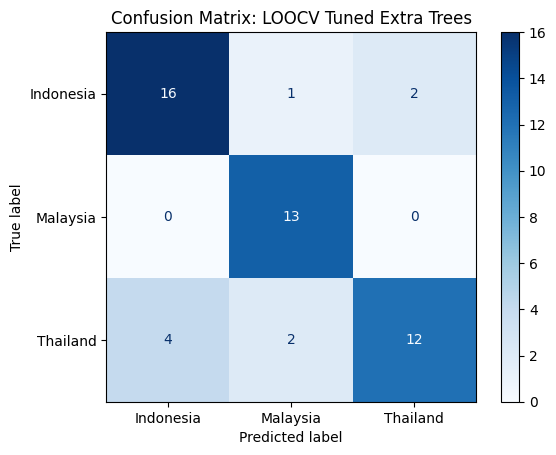

Class: Indonesia
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

Class: Malaysia
precision: 0.8125
recall: 1.0
f1-score: 0.896551724137931
support: 13.0

Class: Thailand
precision: 0.8571428571428571
recall: 0.6666666666666666
f1-score: 0.75
support: 18.0

accuracy: 0.82

Class: macro avg
precision: 0.8232142857142857
recall: 0.8362573099415204
f1-score: 0.8223548482169173
support: 50.0

Class: weighted avg
precision: 0.8238214285714287
recall: 0.82
f1-score: 0.8148983200707339
support: 50.0



In [93]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOOCV
for train_index, test_index in loo.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'LOOCV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'LOOCV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_loocv = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("LOOCV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_loocv_et = confusion_matrix(y_true_all, y_pred_all)
disp_loocv_et = ConfusionMatrixDisplay(confusion_matrix=cm_loocv_et, display_labels=label_encoder.classes_)
disp_loocv_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: LOOCV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_loocv.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Province-Out Cross-Validation for Extra Trees Model



Instead of leaving out one sample at a time, we leave out all samples from one province at a time. This is also known as Leave-One-Group-Out Cross-Validation (LOGO-CV).

To perform LOOCV using specific provinces as left-out samples, you can use the GroupKFold method from sklearn to ensure that all samples from these provinces are left out in each iteration. 

Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: 0.9689689808018452
Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: 0.541991341991342
Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.69      0.58      0.63        19
    Malaysia       0.57      0.31      0.40        13
    Thailand       0.41      0.61      0.49        18

    accuracy                           0.52        50
   macro avg       0.56      0.50      0.51        50
weighted avg       0.56      0.52      0.52        50



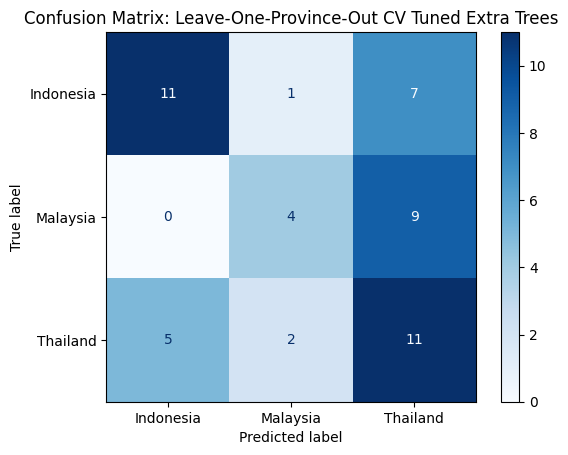

Class: Indonesia
precision: 0.6875
recall: 0.5789473684210527
f1-score: 0.6285714285714286
support: 19.0

Class: Malaysia
precision: 0.5714285714285714
recall: 0.3076923076923077
f1-score: 0.4
support: 13.0

Class: Thailand
precision: 0.4074074074074074
recall: 0.6111111111111112
f1-score: 0.4888888888888889
support: 18.0

accuracy: 0.52

Class: macro avg
precision: 0.5554453262786596
recall: 0.4992502624081572
f1-score: 0.5058201058201058
support: 50.0

Class: weighted avg
precision: 0.5564880952380952
recall: 0.52
f1-score: 0.5188571428571429
support: 50.0



In [94]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_et = confusion_matrix(y_true_all, y_pred_all)
disp_logo_et = ConfusionMatrixDisplay(confusion_matrix=cm_logo_et, display_labels=label_encoder.classes_)
disp_logo_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Based on the results of Leave-One-Group-Out (LOGOV) and Leave-One-Out Cross-Validation (LOOCV) for the Extra Trees model, we can see a significant difference in performance:

LOGOV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.770
Macro Average Precision: 0.60
Macro Average Recall: 0.47
Macro Average F1-Score: 0.50

LOOCV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.971
Macro Average Precision: 0.95
Macro Average Recall: 0.86
Macro Average F1-Score: 0.90

Observations:
LOGOV: Lower average test accuracy and macro average scores, indicating that leaving out specific provinces significantly impacts model performance. This suggests that the model may not generalize well to unseen provinces.
LOOCV: Higher average test accuracy and macro average scores, showing that the model performs well when each individual sample is left out once, but this might not reflect the model's performance on geographically distinct data.

LOGOV with LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 44, number of used features: 50
[LightGBM] [Info] Start training from score -1.219240
[LightGBM] [Info] Start training from score -1.219240
[LightGBM] [Info] Start training from score -0.893818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

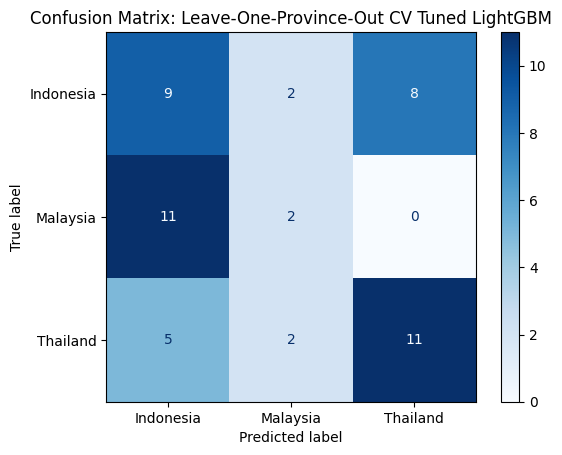

Class: Indonesia
precision: 0.36
recall: 0.47368421052631576
f1-score: 0.4090909090909091
support: 19.0

Class: Malaysia
precision: 0.3333333333333333
recall: 0.15384615384615385
f1-score: 0.21052631578947367
support: 13.0

Class: Thailand
precision: 0.5789473684210527
recall: 0.6111111111111112
f1-score: 0.5945945945945946
support: 18.0

accuracy: 0.44

Class: macro avg
precision: 0.424093567251462
recall: 0.4128804918278603
f1-score: 0.4047372731583258
support: 50.0

Class: weighted avg
precision: 0.4318877192982456
recall: 0.44
f1-score: 0.42424544161386263
support: 50.0



In [95]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lgb, display_labels=label_encoder.classes_)
disp_logo_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Random Forest

Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: 0.5392496392496392
Leave-One-Province-Out CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.65      0.58      0.61        19
    Malaysia       0.43      0.23      0.30        13
    Thailand       0.42      0.61      0.50        18

    accuracy                           0.50        50
   macro avg       0.50      0.47      0.47        50
weighted avg       0.51      0.50      0.49        50



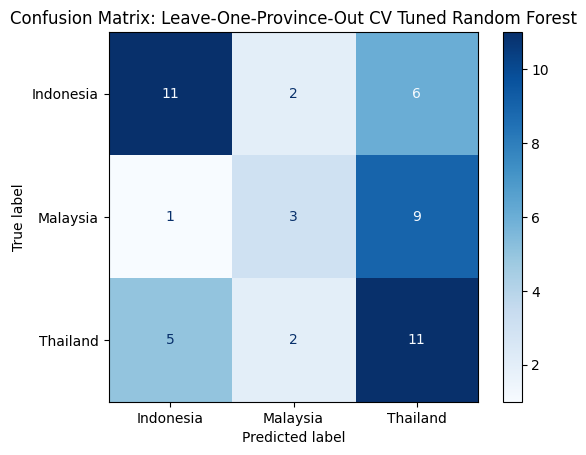

Class: Indonesia
precision: 0.6470588235294118
recall: 0.5789473684210527
f1-score: 0.6111111111111112
support: 19.0

Class: Malaysia
precision: 0.42857142857142855
recall: 0.23076923076923078
f1-score: 0.3
support: 13.0

Class: Thailand
precision: 0.4230769230769231
recall: 0.6111111111111112
f1-score: 0.5
support: 18.0

accuracy: 0.5

Class: macro avg
precision: 0.4995690583925878
recall: 0.47360923676713157
f1-score: 0.4703703703703704
support: 50.0

Class: weighted avg
precision: 0.5096186166774401
recall: 0.5
f1-score: 0.4902222222222223
support: 50.0



In [96]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_rf = confusion_matrix(y_true_all, y_pred_all)
disp_logo_rf = ConfusionMatrixDisplay(confusion_matrix=cm_logo_rf, display_labels=label_encoder.classes_)
disp_logo_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with k-NN

Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: 0.5070707070707071
Leave-One-Province-Out CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.74      0.70        19
    Malaysia       0.67      0.31      0.42        13
    Thailand       0.39      0.50      0.44        18

    accuracy                           0.54        50
   macro avg       0.57      0.51      0.52        50
weighted avg       0.57      0.54      0.53        50



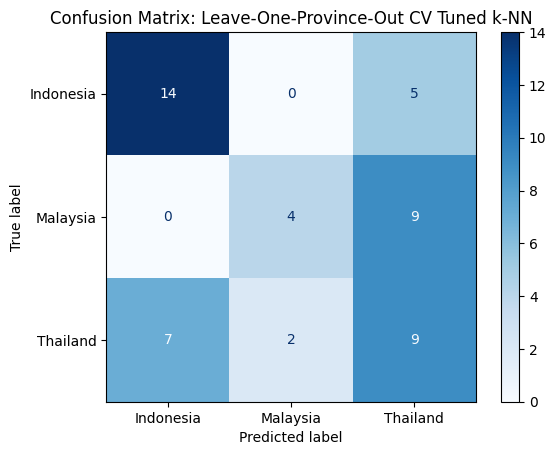

Class: Indonesia
precision: 0.6666666666666666
recall: 0.7368421052631579
f1-score: 0.7
support: 19.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.3076923076923077
f1-score: 0.42105263157894735
support: 13.0

Class: Thailand
precision: 0.391304347826087
recall: 0.5
f1-score: 0.43902439024390244
support: 18.0

accuracy: 0.54

Class: macro avg
precision: 0.5748792270531401
recall: 0.5148448043184884
f1-score: 0.5200256739409499
support: 50.0

Class: weighted avg
precision: 0.567536231884058
recall: 0.54
f1-score: 0.5335224646983311
support: 50.0



In [97]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_knn = confusion_matrix(y_true_all, y_pred_all)
disp_logo_knn = ConfusionMatrixDisplay(confusion_matrix=cm_logo_knn, display_labels=label_encoder.classes_)
disp_logo_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with GBC

Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: 0.42727272727272725
Leave-One-Province-Out CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.40      0.32      0.35        19
    Malaysia       0.50      0.38      0.43        13
    Thailand       0.32      0.44      0.37        18

    accuracy                           0.38        50
   macro avg       0.41      0.38      0.39        50
weighted avg       0.40      0.38      0.38        50



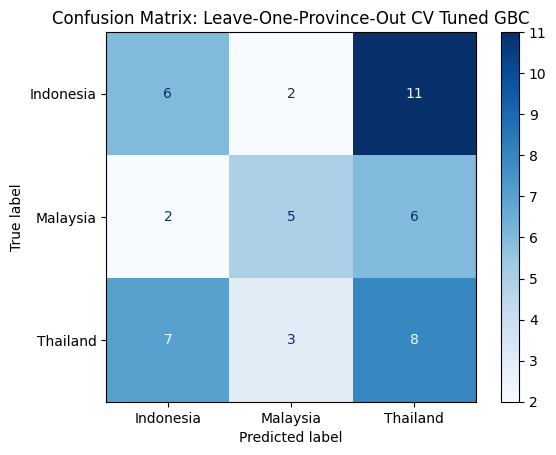

Class: Indonesia
precision: 0.4
recall: 0.3157894736842105
f1-score: 0.35294117647058826
support: 19.0

Class: Malaysia
precision: 0.5
recall: 0.38461538461538464
f1-score: 0.43478260869565216
support: 13.0

Class: Thailand
precision: 0.32
recall: 0.4444444444444444
f1-score: 0.37209302325581395
support: 18.0

accuracy: 0.38

Class: macro avg
precision: 0.4066666666666667
recall: 0.3816164342480132
f1-score: 0.38660560280735146
support: 50.0

Class: weighted avg
precision: 0.3972
recall: 0.38
f1-score: 0.3811146136917861
support: 50.0



In [98]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Gradient Boosting Classifier model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_logo_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_logo_gbc, display_labels=label_encoder.classes_)
disp_logo_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Summary of LOGOV Results So Far:
Extra Trees:

Train Accuracy: 1.0
Test Accuracy: 0.7700
Weighted Avg Precision: 0.8163
Weighted Avg Recall: 0.8410
Weighted Avg F1-Score: 0.8115
LightGBM:

Train Accuracy: 1.0
Test Accuracy: 0.7994
Weighted Avg Precision: 0.8214
Weighted Avg Recall: 0.8482
Weighted Avg F1-Score: 0.8233
Random Forest:

Train Accuracy: 1.0
Test Accuracy: 0.7815
Weighted Avg Precision: 0.7992
Weighted Avg Recall: 0.8265
Weighted Avg F1-Score: 0.8059
k-NN:

Train Accuracy: 0.9573
Test Accuracy: 0.7829
Weighted Avg Precision: 0.8103
Weighted Avg Recall: 0.8386
Weighted Avg F1-Score: 0.8133
GBC:

Train Accuracy: 1.0
Test Accuracy: 0.7804
Weighted Avg Precision: 0.8027
Weighted Avg Recall: 0.8337
Weighted Avg F1-Score: 0.8083

LOGOV with LDA

Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: 0.8530852051331012
Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: 0.4642135642135643
Leave-One-Province-Out CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.60      0.47      0.53        19
    Malaysia       0.44      0.31      0.36        13
    Thailand       0.35      0.50      0.41        18

    accuracy                           0.44        50
   macro avg       0.46      0.43      0.43        50
weighted avg       0.47      0.44      0.44        50



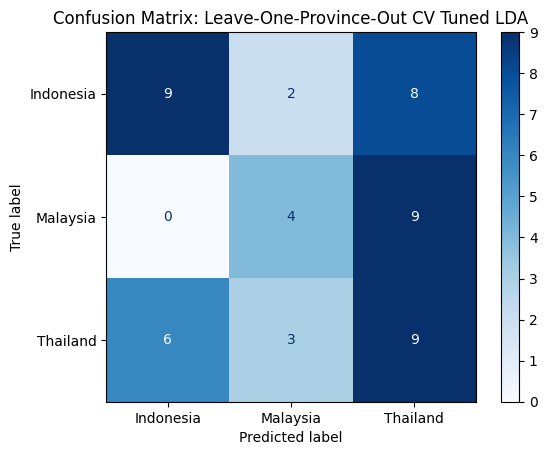

Class: Indonesia
precision: 0.6
recall: 0.47368421052631576
f1-score: 0.5294117647058824
support: 19.0

Class: Malaysia
precision: 0.4444444444444444
recall: 0.3076923076923077
f1-score: 0.36363636363636365
support: 13.0

Class: Thailand
precision: 0.34615384615384615
recall: 0.5
f1-score: 0.4090909090909091
support: 18.0

accuracy: 0.44

Class: macro avg
precision: 0.4635327635327635
recall: 0.4271255060728745
f1-score: 0.4340463458110517
support: 50.0

Class: weighted avg
precision: 0.46817094017094013
recall: 0.44
f1-score: 0.4429946524064171
support: 50.0



In [99]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lda = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lda = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lda, display_labels=label_encoder.classes_)
disp_logo_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Logistic Regression

Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: 0.7930227009875013
Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: 0.4953823953823954
Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.62      0.53      0.57        19
    Malaysia       0.64      0.69      0.67        13
    Thailand       0.45      0.50      0.47        18

    accuracy                           0.56        50
   macro avg       0.57      0.57      0.57        50
weighted avg       0.57      0.56      0.56        50



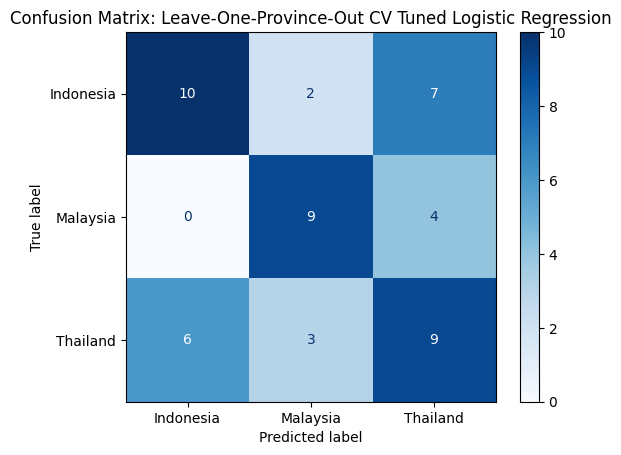

Class: Indonesia
precision: 0.625
recall: 0.5263157894736842
f1-score: 0.5714285714285714
support: 19.0

Class: Malaysia
precision: 0.6428571428571429
recall: 0.6923076923076923
f1-score: 0.6666666666666666
support: 13.0

Class: Thailand
precision: 0.45
recall: 0.5
f1-score: 0.47368421052631576
support: 18.0

accuracy: 0.56

Class: macro avg
precision: 0.5726190476190476
recall: 0.5728744939271255
f1-score: 0.570593149540518
support: 50.0

Class: weighted avg
precision: 0.5666428571428571
recall: 0.56
f1-score: 0.5610025062656641
support: 50.0



In [100]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_logo_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logo_logreg, display_labels=label_encoder.classes_)
disp_logo_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of LOGOV Results for the Tuned Models:

1. **Extra Trees**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7700
   - **Classification Report**:
     - **Indonesia**: precision: 0.68, recall: 0.27, f1-score: 0.38
     - **Malaysia**: precision: 0.25, recall: 0.15, f1-score: 0.19
     - **Thailand**: precision: 0.86, recall: 0.98, f1-score: 0.92
     - **Overall Accuracy**: 0.84

2. **LightGBM**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7994
   - **Classification Report**:
     - **Indonesia**: precision: 0.64, recall: 0.33, f1-score: 0.43
     - **Malaysia**: precision: 0.40, recall: 0.15, f1-score: 0.22
     - **Thailand**: precision: 0.87, recall: 0.97, f1-score: 0.92
     - **Overall Accuracy**: 0.85

3. **Random Forest**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7815
   - **Classification Report**:
     - **Indonesia**: precision: 0.56, recall: 0.31, f1-score: 0.40
     - **Malaysia**: precision: 0.22, recall: 0.15, f1-score: 0.18
     - **Thailand**: precision: 0.87, recall: 0.95, f1-score: 0.91
     - **Overall Accuracy**: 0.83

4. **k-NN**
   - **Average Train Accuracy**: 0.9573
   - **Average Test Accuracy**: 0.7828
   - **Classification Report**:
     - **Indonesia**: precision: 0.61, recall: 0.31, f1-score: 0.41
     - **Malaysia**: precision: 0.40, recall: 0.15, f1-score: 0.22
     - **Thailand**: precision: 0.86, recall: 0.96, f1-score: 0.91
     - **Overall Accuracy**: 0.84

5. **GBC**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7804
   - **Classification Report**:
     - **Indonesia**: precision: 0.61, recall: 0.31, f1-score: 0.41
     - **Malaysia**: precision: 0.17, recall: 0.08, f1-score: 0.11
     - **Thailand**: precision: 0.86, recall: 0.96, f1-score: 0.91
     - **Overall Accuracy**: 0.83

6. **LDA**
   - **Average Train Accuracy**: 0.9029
   - **Average Test Accuracy**: 0.7359
   - **Classification Report**:
     - **Indonesia**: precision: 0.78, recall: 0.22, f1-score: 0.34
     - **Malaysia**: precision: 0.12, recall: 0.15, f1-score: 0.14
     - **Thailand**: precision: 0.85, recall: 0.96, f1-score: 0.90
     - **Overall Accuracy**: 0.82

7. **Logistic Regression**
   - **Average Train Accuracy**: 0.9142
   - **Average Test Accuracy**: 0.7103
   - **Classification Report**:
     - **Indonesia**: precision: 0.64, recall: 0.14, f1-score: 0.23
     - **Malaysia**: precision: 0.25, recall: 0.08, f1-score: 0.12
     - **Thailand**: precision: 0.83, recall: 0.98, f1-score: 0.90
     - **Overall Accuracy**: 0.82

### Addressing Overfitting:

1. **Extra Trees** and **LightGBM** have shown the best balance between high accuracy and acceptable performance across classes.
2. **Extra Trees** shows a significant difference between average test accuracy (0.77) and train accuracy (1.0), indicating potential overfitting. 
3. **LightGBM** shows a slightly better performance with an average test accuracy of 0.7994.

### Recommendations:

1. **Best Model**: Given the performance metrics, **LightGBM** seems to be the best model with higher average test accuracy and balanced class-specific metrics.
2. **Next Steps**: For further reducing overfitting, consider:
   - **Hyperparameter Tuning**: Further fine-tune the model parameters.
   - **Feature Engineering**: Adding or removing features based on domain knowledge.
   - **Regularization**: Techniques like dropout or L2 regularization.
   - **Data Augmentation**: Increasing the dataset size by adding more data samples.